# Online Sales Prediction Project
by Jasmine Chung

This project is to predict "quantity", using both categorical and numerical data given. The overall content is as following:

1. Business Problem Definition
2. Data Overview
3. Exploratory Data Analysis (EDA)
4. Data Cleaning
5. Feature Engineering
6. Feature Seleection
7. Data Encoding
8. Machine Learning Models
9. Model Selection - Cross Validation
10. Grid Search
11. Learning Curve
12. Pipeline

# 1. Business Problem Definition

Business Scenario: 
- The company faces frequent stockouts of popular products due to limited ability to forecast demand spikes. Additionally, the dynamic pricing and stock conditions of competitors on multiple platforms are difficult to monitor in real-time. As a result, internal inventory and restocking decisions lack data support, increasing operational inefficiencies.

Business Problem:
- Difficulty predicting hot-selling items often leads to stockouts or overstocking.
- Inability to quickly capture competitors’ price changes and stock conditions across platforms.
- Lack of data-driven decision support for internal inventory and replenishment strategies.

Business Objective

- The primary goal is to build a machine learning model to predict the "quantity" of online sales dataset.

# 2. Data Overview 

To begin with, a dataset overview including the brief scan of the head, the understanding of data types, missing values number, and duplication can help further imputation and analysis.

In [29]:
import pandas as pd

# Load the dataset
file_path = 'testdata/online_0616d24.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()

,Description,Quantity,Year,Quarter,Month,DateofWeek,Hour,InvoiceDate,UnitPrice,Country,Discount,PaymentMethod,ShippingCost,Category,ShipmentProvider,WarehouseLocation
0,White Mug,38,2020,Q1,Jan,Wed,0,2020/1/1 00:00,1.71,Australia,0.470000,Bank Transfer,10.79,Apparel,UPS,London
1,White Mug,18,2020,Q1,Jan,Wed,1,2020/1/1 01:00,41.25,Spain,0.190000,paypall,9.51,Electronics,UPS,Rome
2,Headphones,49,2020,Q1,Jan,Wed,2,2020/1/1 02:00,29.11,Germany,0.350000,Bank Transfer,23.03,Electronics,UPS,Berlin
3,Desk Lamp,14,2020,Q1,Jan,Wed,3,2020/1/1 03:00,76.68,Netherlands,0.140000,paypall,11.08,Accessories,Royal Mail,Rome
4,USB Cable,-30,2020,Q1,Jan,Wed,4,2020/1/1 04:00,-68.11,United Kingdom,1.501433,Bank Transfer,NaN,Electronics,FedEx,NaN


In [30]:
# Understand the Non-Null Count and Dtype of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43825 entries, 0 to 43824
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Description        43825 non-null  object 
 1   Quantity           43825 non-null  int64  
 2   Year               43825 non-null  int64  
 3   Quarter            43825 non-null  object 
 4   Month              43825 non-null  object 
 5   DateofWeek         43825 non-null  object 
 6   Hour               43825 non-null  int64  
 7   InvoiceDate        43825 non-null  object 
 8   UnitPrice          43825 non-null  float64
 9   Country            43825 non-null  object 
 10  Discount           43825 non-null  float64
 11  PaymentMethod      43825 non-null  object 
 12  ShippingCost       41682 non-null  float64
 13  Category           43825 non-null  object 
 14  ShipmentProvider   43825 non-null  object 
 15  WarehouseLocation  40787 non-null  object 
dtypes: float64(3), int64(3

In [31]:
# Count missing values in every column
df.isnull().sum()

Description             0
Quantity                0
Year                    0
Quarter                 0
Month                   0
DateofWeek              0
Hour                    0
InvoiceDate             0
UnitPrice               0
Country                 0
Discount                0
PaymentMethod           0
ShippingCost         2143
Category                0
ShipmentProvider        0
WarehouseLocation    3038
dtype: int64

In [32]:
# Drop the 'id' column temporarily for duplicate checking
# df_no_id = df.drop('id', axis=1)

# Find duplicates (considering all other columns)
duplicates = df.duplicated(keep=False)

# Show the duplicate rows based on the original DataFrame
duplicate_rows = df[duplicates]

# Print the duplicate rows
print(duplicate_rows)


Empty DataFrame
Columns: [Description, Quantity, Year, Quarter, Month, DateofWeek, Hour, InvoiceDate, UnitPrice, Country, Discount, PaymentMethod, ShippingCost, Category, ShipmentProvider, WarehouseLocation]
Index: []


Drop duplicates directly.

In [33]:
# Drop duplicates excluding the 'id' column
# df = df.drop_duplicates(subset=df.columns.difference(['id']))

# Check the DataFrame without duplicates
# print(df.head())
# print(df.info())
# print(df.isnull().sum())

### Comment:
From this overview, it is known that there are categorical and numerical features in this dataset and both of them are with a considerable amount of missing values, suggesting a need to operate systematic imputation for them based on their respective charateristics.

# 3. Exploratory Data Analysis (EDA) 

- In this project, EDA will precede data cleaning.
- This sequencing ensures that the imputation of missing values is informed by an in-depth understanding of the dataset's characteristics. 
- By conducting EDA first, imputation strategies can be tailored to align with the observed patterns of numerical and categorical features.

### ・Numerical Data

There are "Quantity", "Year", "Hour", "UnitPrice", "Discount" and "ShippingCost" as numerical data in this dataset.

In [34]:
# For numerical columns, get descriptive statistics 
df.describe()

,Quantity,Year,Hour,UnitPrice,Discount,ShippingCost
count,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,41682.000000
mean,22.398950,2021.998950,11.499738,47.499620,0.275595,17.491050
std,17.867864,1.414633,6.922405,33.366691,0.229045,7.216277
min,-50.000000,2020.000000,0.000000,-99.980000,0.000000,5.000000
25%,11.000000,2021.000000,5.000000,23.590000,0.130000,11.222500
50%,23.000000,2022.000000,11.000000,48.760000,0.260000,17.480000
75%,37.000000,2023.000000,17.000000,74.460000,0.380000,23.720000
max,49.000000,2024.000000,23.000000,100.000000,1.999764,30.000000


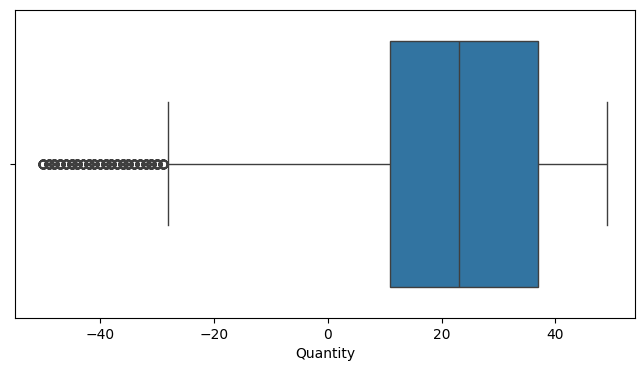

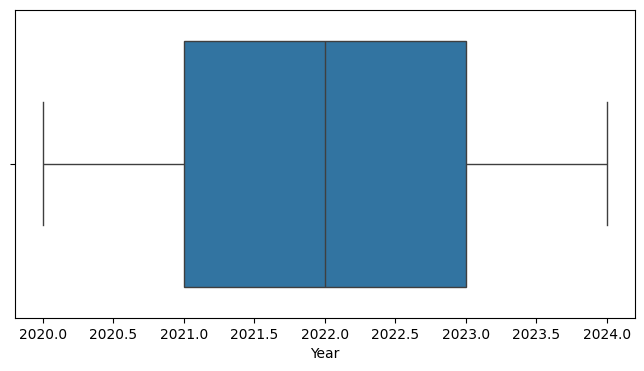

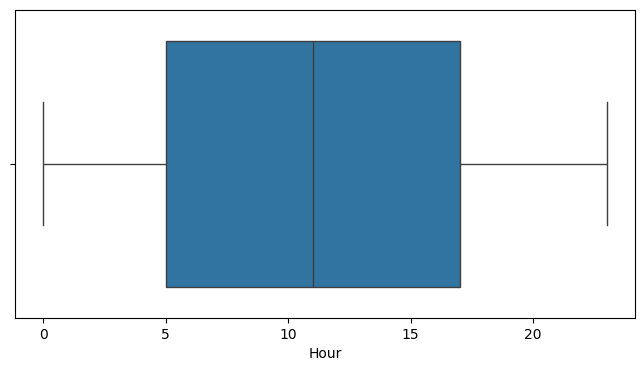

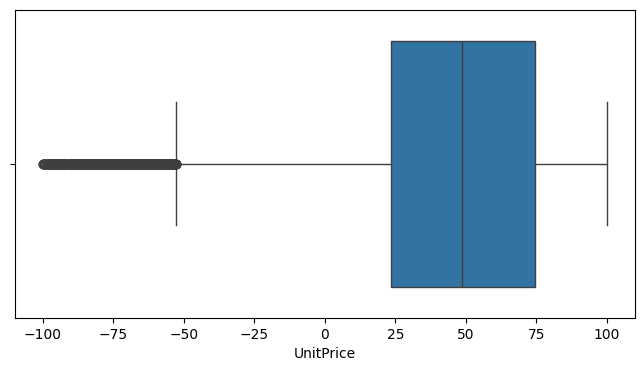

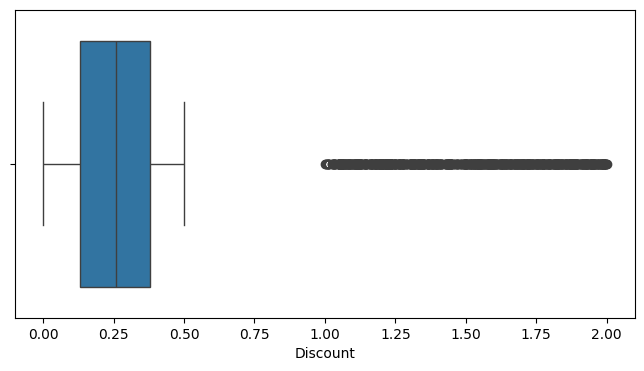

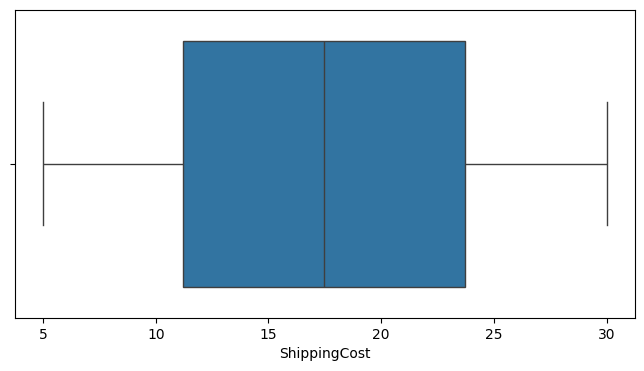

In [8]:
# Box plots are useful for identifying outliers and understanding the spread of the data
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns and exclude 'id'
numerical_cols = df.select_dtypes(include=['int64', 'float64'])

# Loop through the selected numerical columns and create box plots
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.show()

For numerical columns,  histogram graphs with curved lines are proper in showing the distribution of the data.

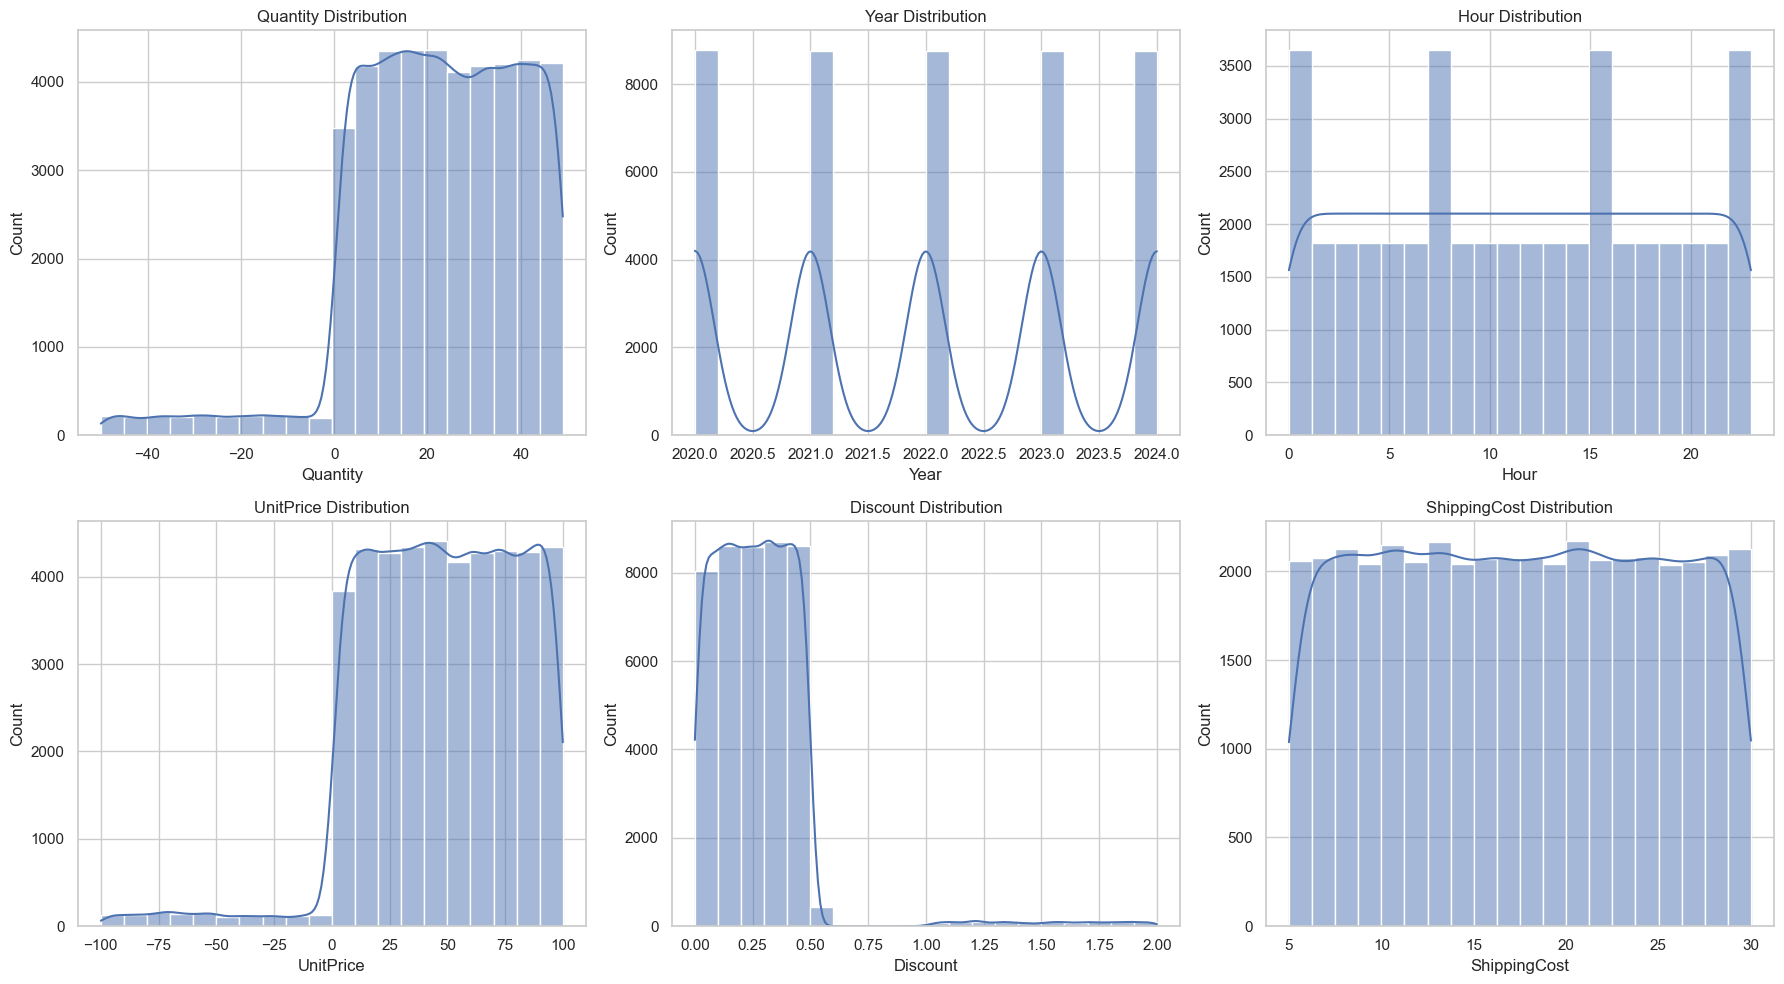

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# 數值欄位
num_cols = ['Quantity', 'Year', 'Hour', 'UnitPrice', 'Discount', 'ShippingCost']

# 設定子圖數量
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()  # 轉成一維方便迴圈處理

# 畫出每個欄位的分布圖
for i, col in enumerate(num_cols):
    sns.histplot(df[col], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'{col} Distribution')

plt.tight_layout()
plt.show()


### Comment:
Based on the box plots, there are apparent outliers in the distributions of Quantity, UnitPrice, and ShippingCost. The histogram graphs further show that Quantity and UnitPrice are left-skewed, while Discount is right-skewed. These observations highlight the need to remove outliers during the data cleaning process.

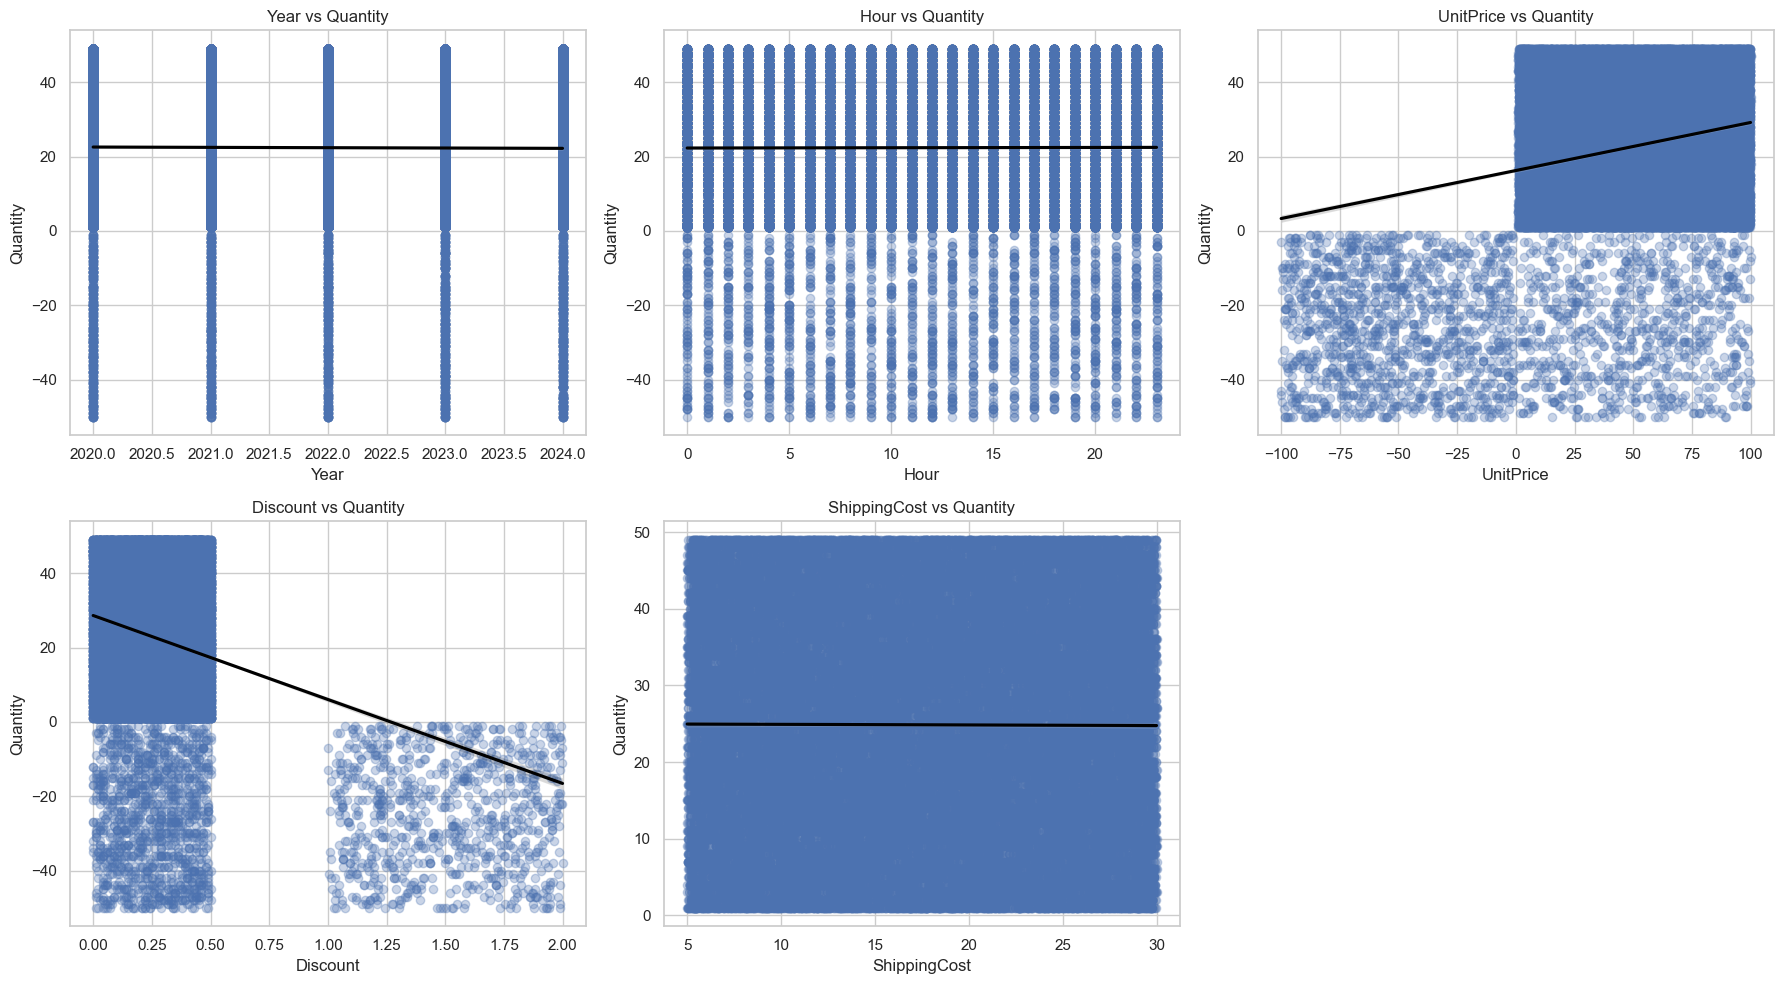

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# nul cols
num_cols = ['Year', 'Hour', 'UnitPrice', 'Discount', 'ShippingCost']

# set format
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

# every num cols to Quantity as a chart
for i, col in enumerate(num_cols):
    sns.regplot(x=df[col], y=df['Quantity'], ax=axes[i], scatter_kws={'alpha':0.3}, line_kws={'color':'black'})
    axes[i].set_title(f'{col} vs Quantity')

# close redundant charts
for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from IPython.display import display

# Step 1: df_num
df_num = df.select_dtypes(include=['float64', 'int64']).copy()

# Step 2
for col in df_num.columns:
    print(f"Column: {col}")
    print(df_num[col].value_counts(dropna=False))
    print("\n")

# Step 3
num_cols = [col for col in df_num.columns if col != 'Quantity']

# Step 4
results = []

# Step 5
for col in num_cols:
    # remove missing values
    temp_df = df_num[[col, 'Quantity']].dropna()

    X = temp_df[[col]]
    y = temp_df['Quantity']

    model = LinearRegression()
    model.fit(X, y)

    results.append({
        'Feature': col,
        'Coefficient': model.coef_[0],
        'Intercept': model.intercept_,
        'R² Score': model.score(X, y)
    })

# Step 6: result
regression_df = pd.DataFrame(results)
display(regression_df)


Column: Quantity
Quantity
 23    927
 16    901
 20    897
 11    894
 4     886
      ... 
-5      35
-46     35
-40     33
-23     32
-43     23
Name: count, Length: 99, dtype: int64


Column: Year
Year
2020    8784
2024    8761
2021    8760
2022    8760
2023    8760
Name: count, dtype: int64


Column: Hour
Hour
0     1827
1     1826
2     1826
3     1826
4     1826
5     1826
6     1826
7     1826
8     1826
9     1826
10    1826
11    1826
12    1826
13    1826
14    1826
15    1826
16    1826
17    1826
18    1826
19    1826
20    1826
21    1826
22    1826
23    1826
Name: count, dtype: int64


Column: UnitPrice
UnitPrice
 1.57     13
 91.57    13
 89.28    13
 48.59    13
 79.55    13
          ..
-56.19     1
-3.95      1
 11.53     1
 48.93     1
 71.62     1
Name: count, Length: 10963, dtype: int64


Column: Discount
Discount
0.310000    948
0.340000    935
0.390000    921
0.490000    908
0.320000    897
           ... 
1.894471      1
1.406984      1
1.057000      1
1.024367

,Feature,Coefficient,Intercept,R² Score
0,Year,-0.087978,200.289957,0.000049
1,Hour,0.007464,22.313111,0.000008
2,UnitPrice,0.129206,16.261717,0.058216
3,Discount,-22.588144,28.624136,0.083841
4,ShippingCost,-0.007772,25.005643,0.000016


### Comment:

Discount and UnitPrice have a noticeable impact on Quantity:
- Changes in discount significantly affect sales volume.
- Higher unit prices are slightly associated with higher quantities sold, possibly indicating a stable customer base for premium products.
- The other variables (Year, Hour, ShippingCost) have almost no explanatory power for variations in sales quantity.

### ・Categorical Data

In this dataset, there are "Description", "Quarter", "Month", "DateofWeek", "InvoiceDate", "Country", "PaymentMethod", "Category", "ShipmentProvider" and "WarehouseLocation" as cat cols.

In [40]:
print(df.dtypes)

Description           object
Quantity               int64
Year                   int64
Quarter               object
Month                 object
DateofWeek            object
Hour                   int64
InvoiceDate           object
UnitPrice            float64
Country               object
Discount             float64
PaymentMethod         object
ShippingCost         float64
Category              object
ShipmentProvider      object
WarehouseLocation     object
dtype: object


In [41]:
# For categorical columns, find the unique values and their counts
for col in df.select_dtypes(include=['object']).columns:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("\n")

Column: Description
Description
Wall Clock        4075
USB Cable         4024
Backpack          4022
Headphones        4014
Office Chair      4000
Desk Lamp         3994
White Mug         3994
Blue Pen          3971
Notebook          3921
Wireless Mouse    3905
T-shirt           3905
Name: count, dtype: int64


Column: Quarter
Quarter
Q3    11040
Q4    11017
Q2    10920
Q1    10848
Name: count, dtype: int64


Column: Month
Month
Jan    3720
Mar    3720
Jul    3720
May    3720
Aug    3720
Oct    3720
Dec    3697
Apr    3600
Sep    3600
Jun    3600
Nov    3600
Feb    3408
Name: count, dtype: int64


Column: DateofWeek
DateofWeek
Wed    6264
Thu    6264
Fri    6264
Sat    6264
Sun    6264
Mon    6264
Tue    6241
Name: count, dtype: int64


Column: InvoiceDate
InvoiceDate
2024/12/31 00:00    1
2020/1/1 00:00      1
2020/1/1 01:00      1
2020/1/1 02:00      1
2020/1/1 03:00      1
                   ..
2020/1/1 20:00      1
2020/1/1 21:00      1
2020/1/1 22:00      1
2020/1/1 23:00      1
2

### Comment:
There is a need to convert "Year" and "Hour" into categorical features to replace "InvoiceDate", as they can better represent temporal patterns such as seasonality or time-based buying behavior in a simplified form.

In [46]:
df['Year'] = df['Year'].astype('category')
df['Hour'] = df['Hour'].astype('category')


for col in df.columns:
    unique_vals = df[col].nunique()
    total_vals = df[col].count()
    
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')

df = df.drop(columns=['InvoiceDate'], errors='ignore')

print(df.dtypes)

Description          category
Quantity                int64
Year                 category
Quarter              category
Month                category
DateofWeek           category
Hour                 category
UnitPrice             float64
Country              category
Discount              float64
PaymentMethod        category
ShippingCost          float64
Category             category
ShipmentProvider     category
WarehouseLocation    category
dtype: object


As for categorical columns, bar charts are suitable to present the constitution of data in each of them.

C:\Users\2401050\AppData\Local\Temp\ipykernel_19596\1173158410.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


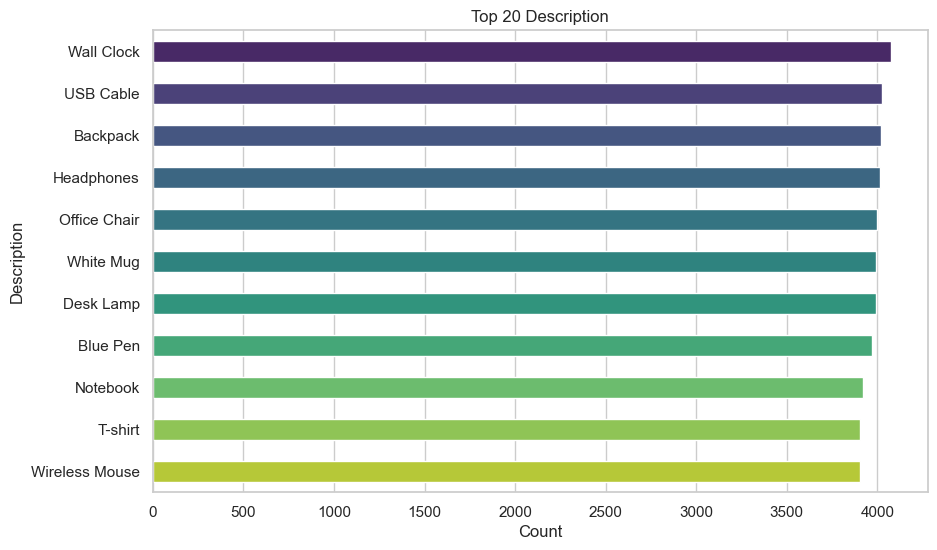

C:\Users\2401050\AppData\Local\Temp\ipykernel_19596\1173158410.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


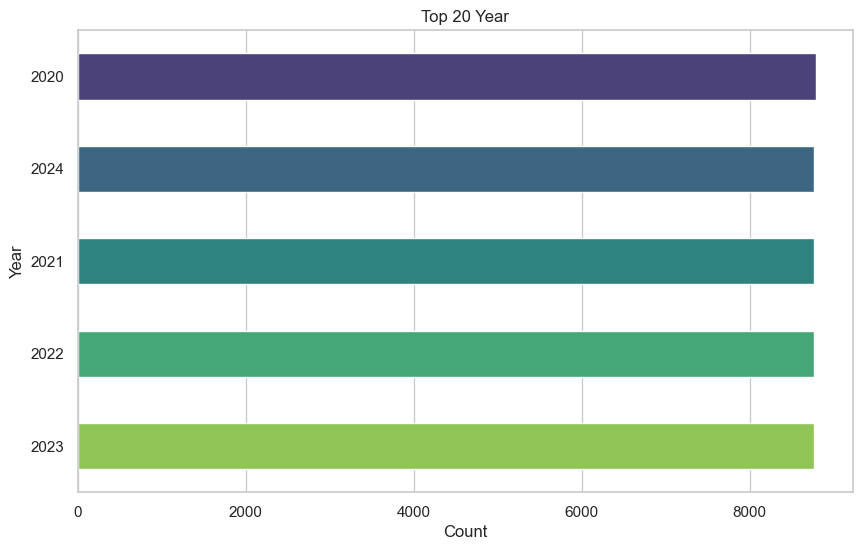

C:\Users\2401050\AppData\Local\Temp\ipykernel_19596\1173158410.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


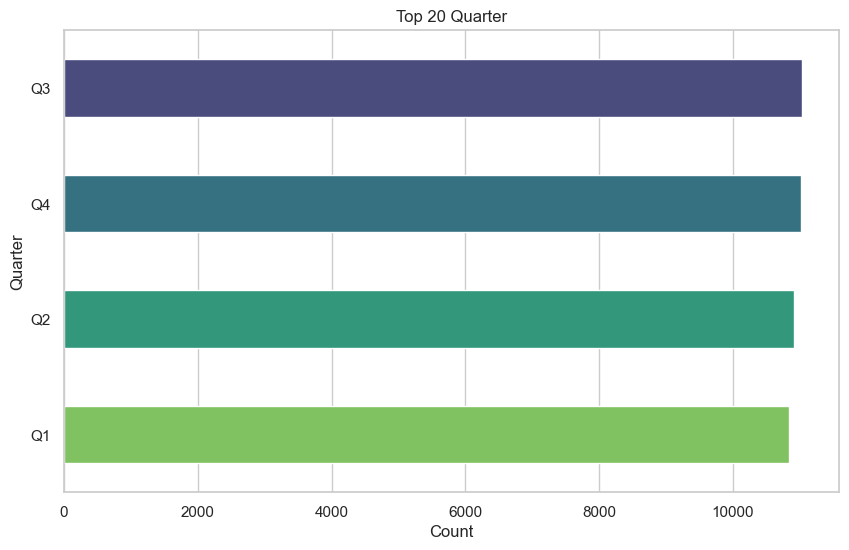

C:\Users\2401050\AppData\Local\Temp\ipykernel_19596\1173158410.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


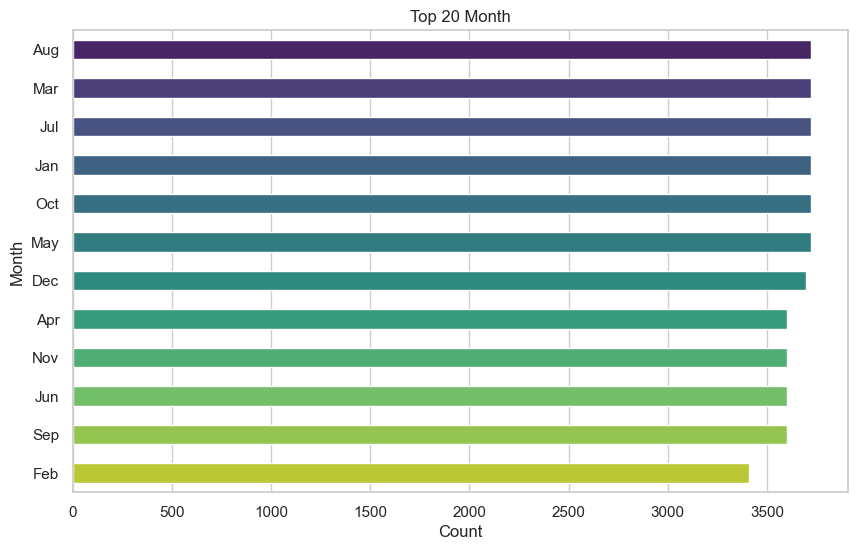

C:\Users\2401050\AppData\Local\Temp\ipykernel_19596\1173158410.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


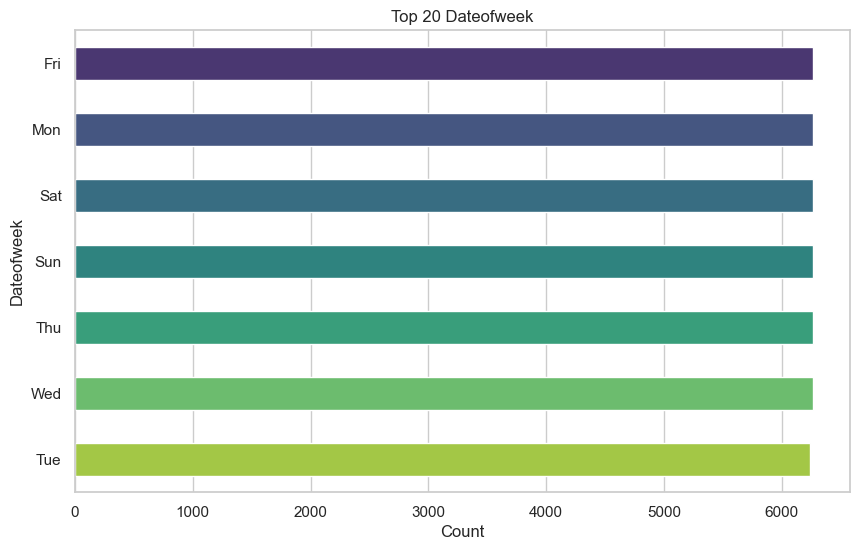

C:\Users\2401050\AppData\Local\Temp\ipykernel_19596\1173158410.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


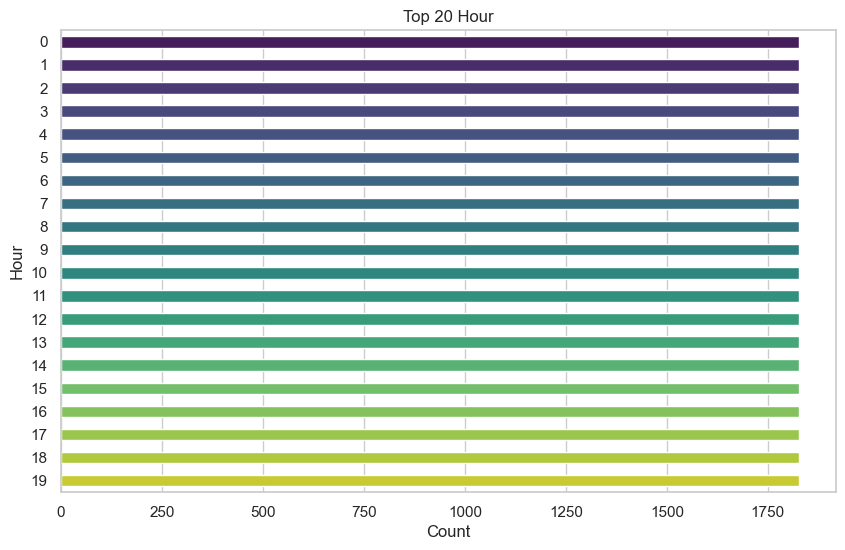

C:\Users\2401050\AppData\Local\Temp\ipykernel_19596\1173158410.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


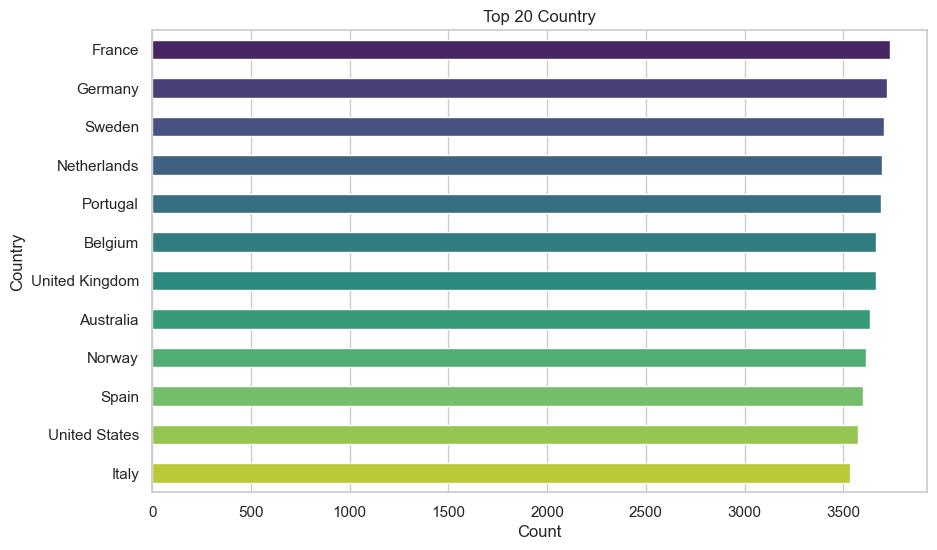

C:\Users\2401050\AppData\Local\Temp\ipykernel_19596\1173158410.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


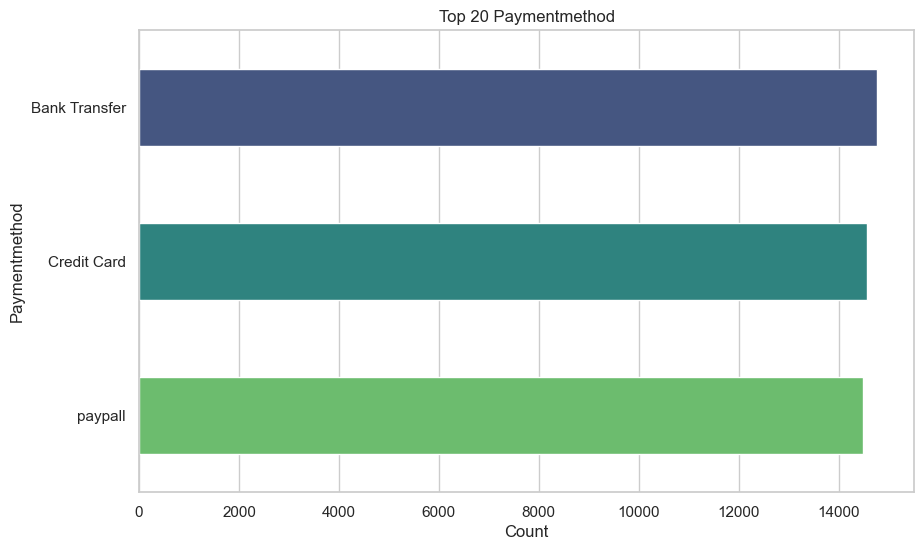

C:\Users\2401050\AppData\Local\Temp\ipykernel_19596\1173158410.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


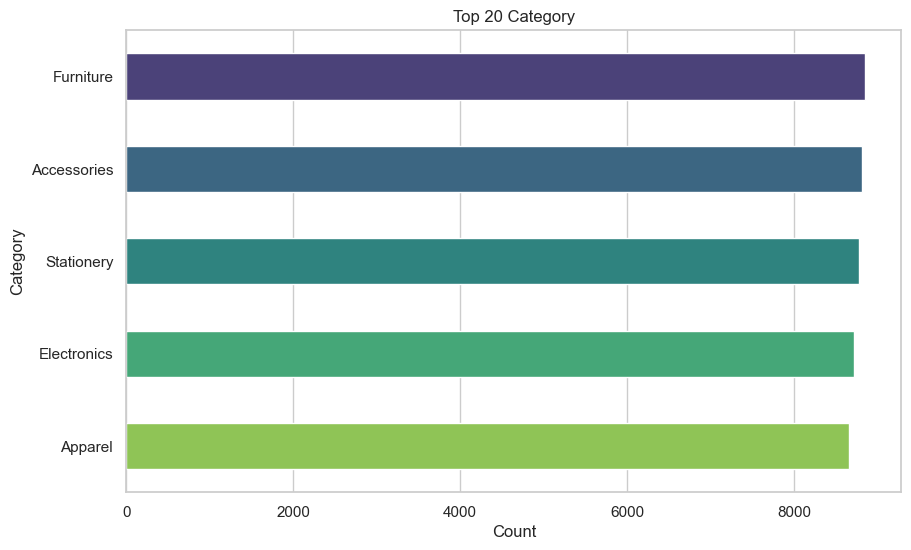

C:\Users\2401050\AppData\Local\Temp\ipykernel_19596\1173158410.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


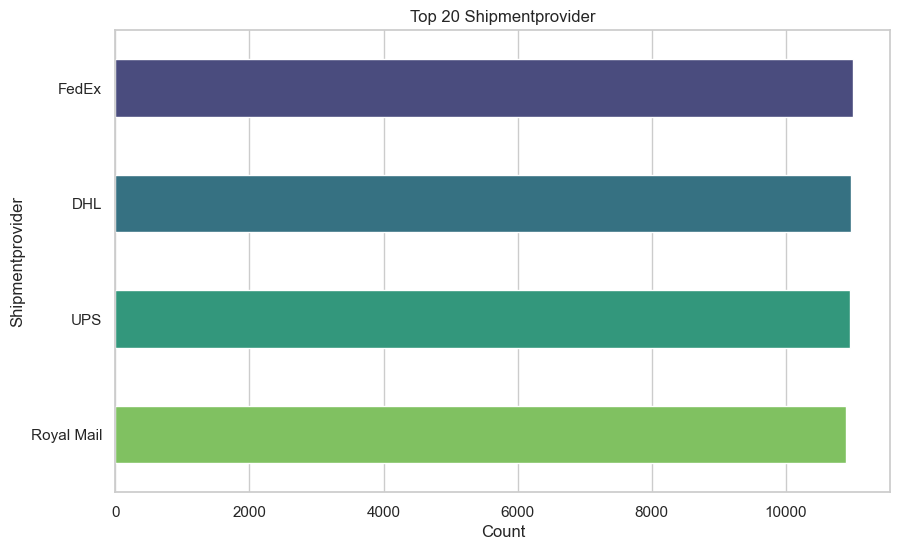

C:\Users\2401050\AppData\Local\Temp\ipykernel_19596\1173158410.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


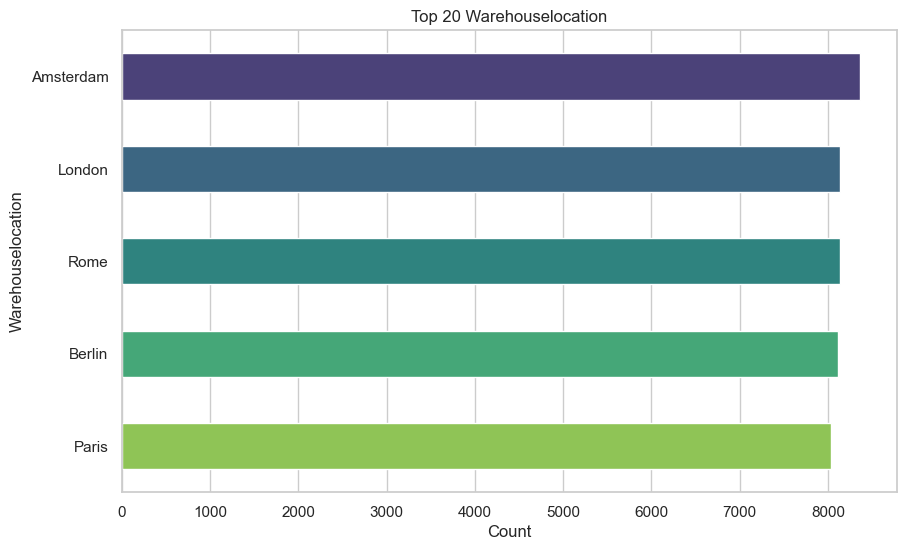

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

def plot_top_n_categories(df, column, n=10, bar_width=0.5):
    plt.figure(figsize=(10, 6))
    top_n = df[column].value_counts().sort_values(ascending=False).head(n)
    
    sns.barplot(
        x=top_n.values,
        y=top_n.index,
        palette="viridis",          # 可換其他 palette
        width=bar_width,
        order=top_n.index          
    )
    
    plt.title(f'Top {n} {column.title()}')
    plt.xlabel('Count')
    plt.ylabel(column.title())
    plt.show()

# 自動抓分類欄位
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

# 畫圖
N = 20
for column in categorical_columns:
    plot_top_n_categories(df, column, N)


### ・"Quantity" and all categorical features

Next, it is the relationship for all the categorical features to "quantity" using box plot. Based on frequency, 20 groups for each featutre will be presented to know the overall trend.

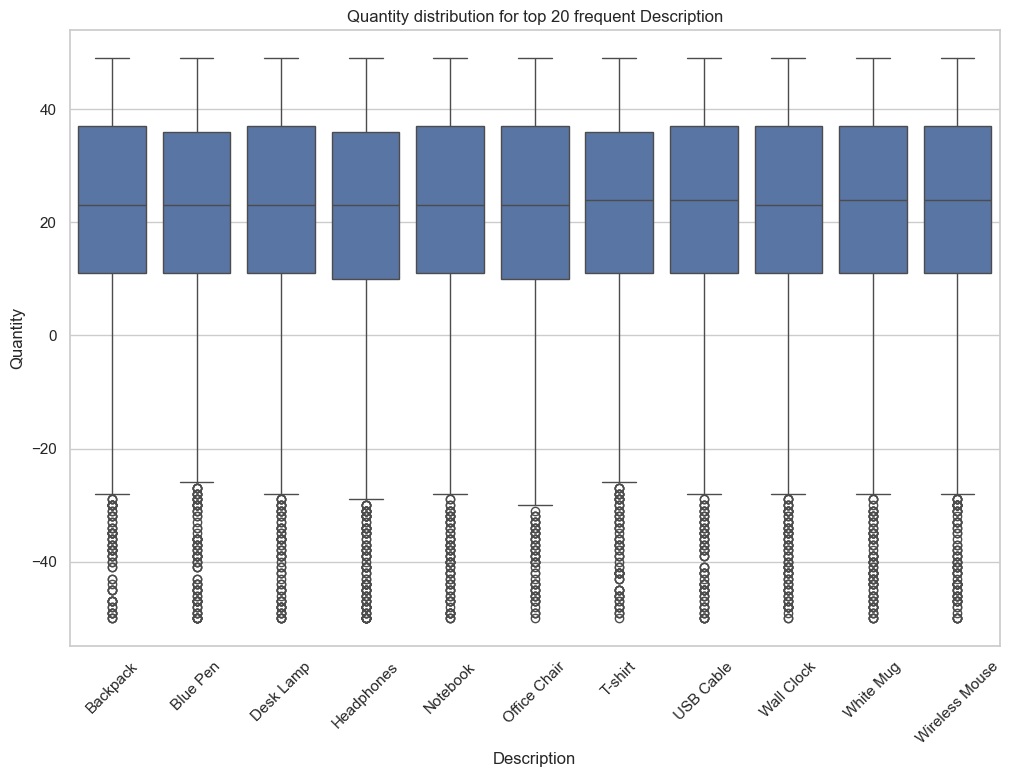

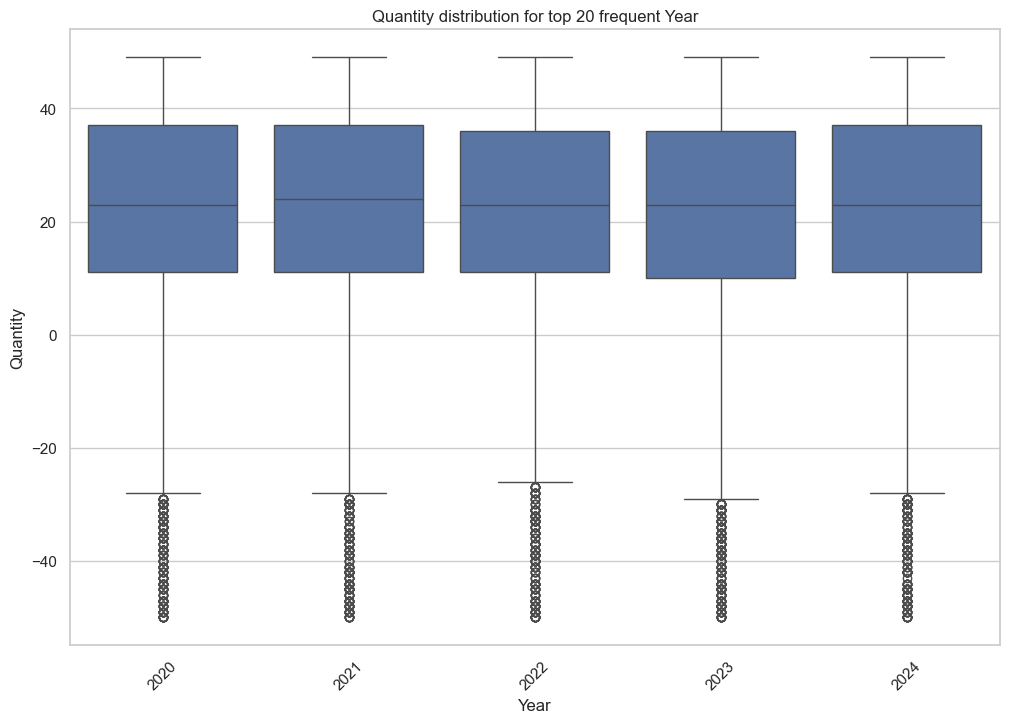

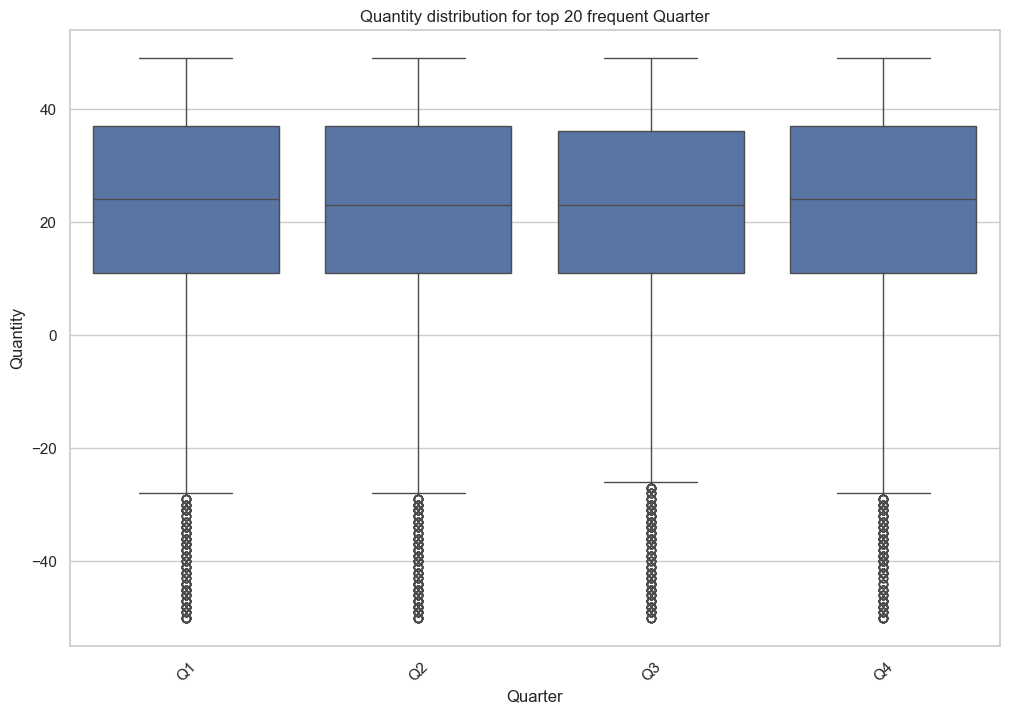

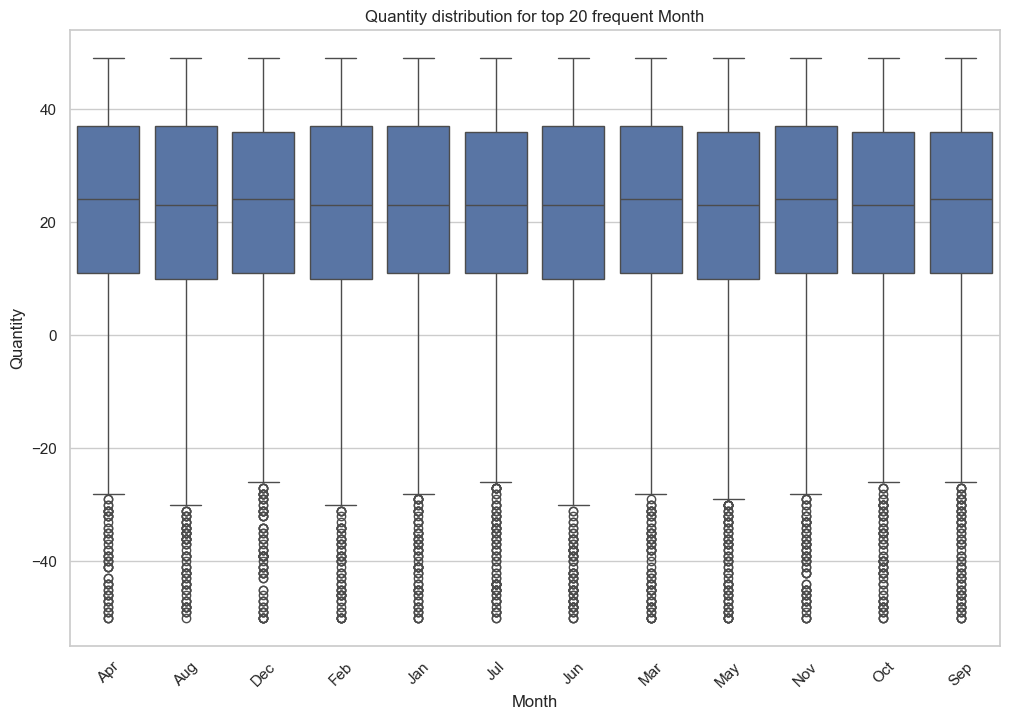

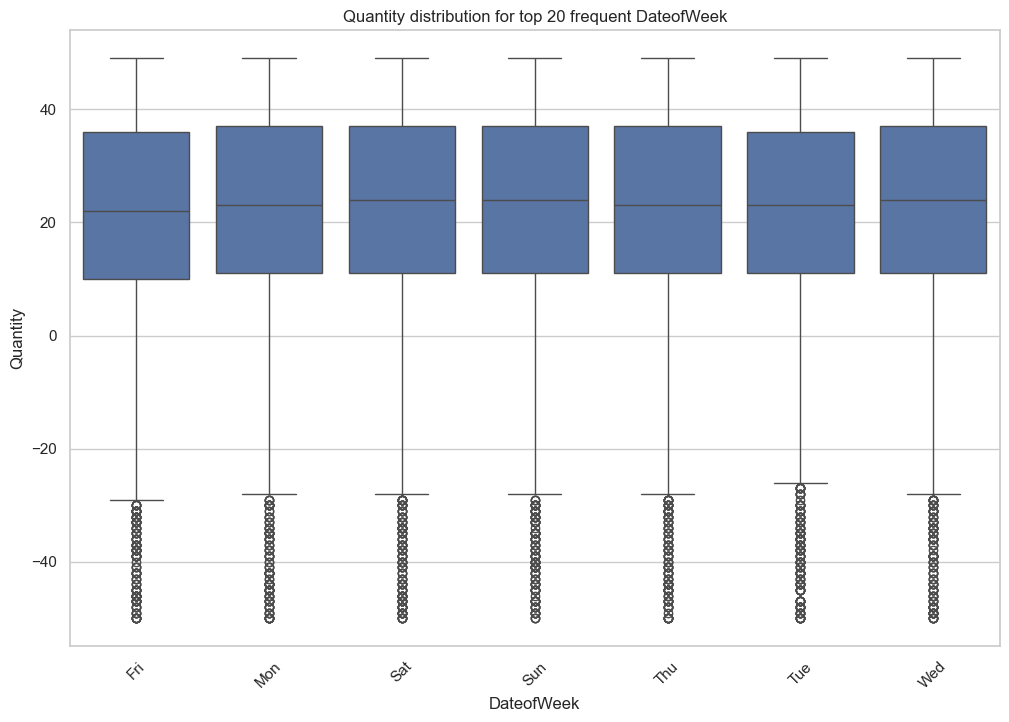

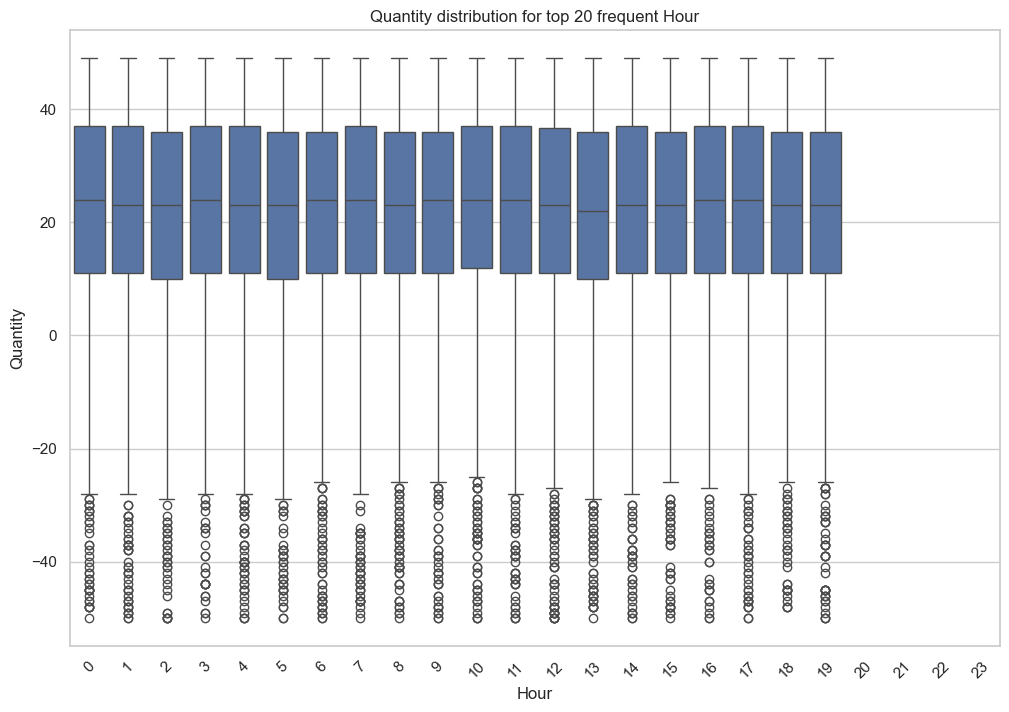

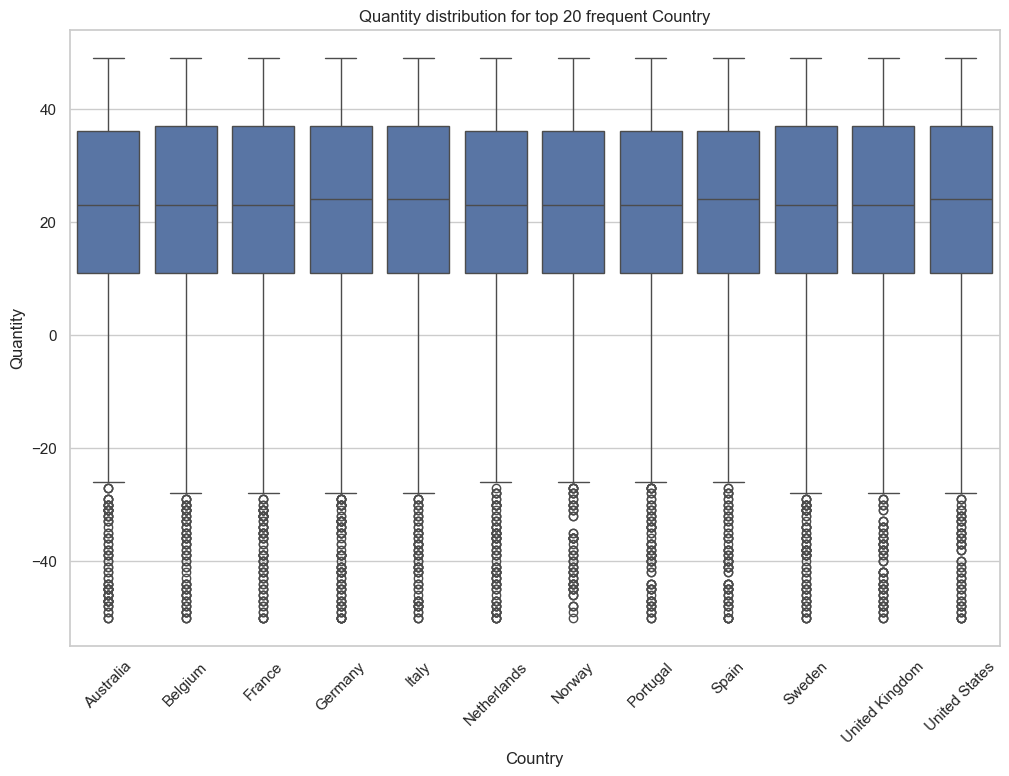

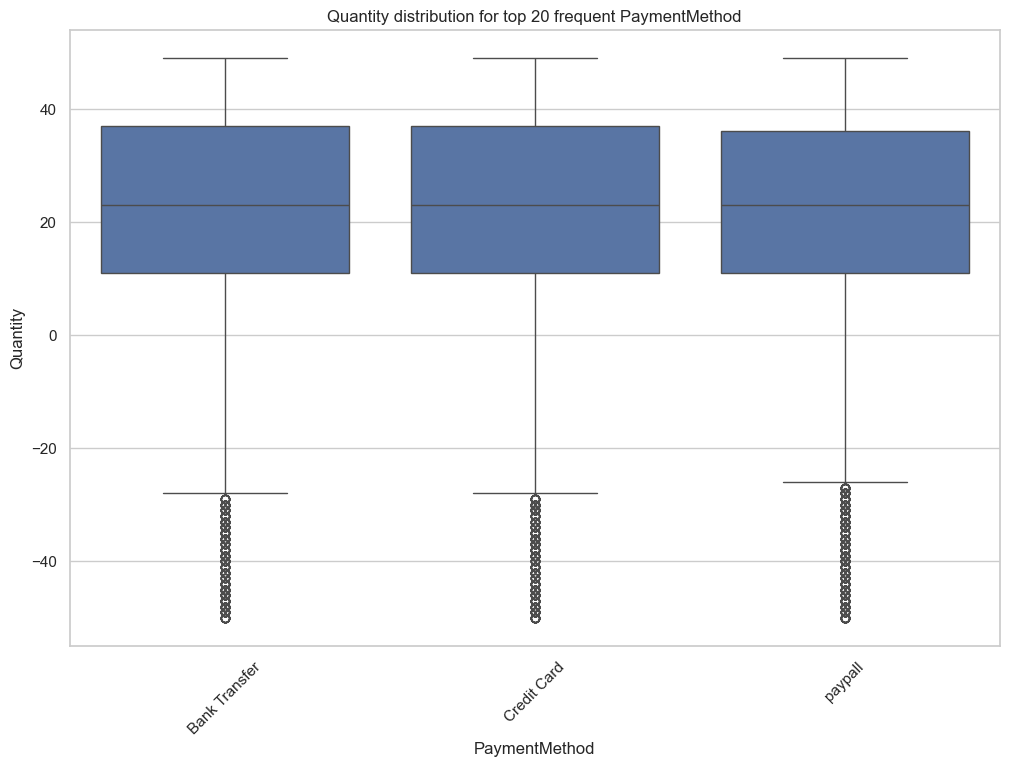

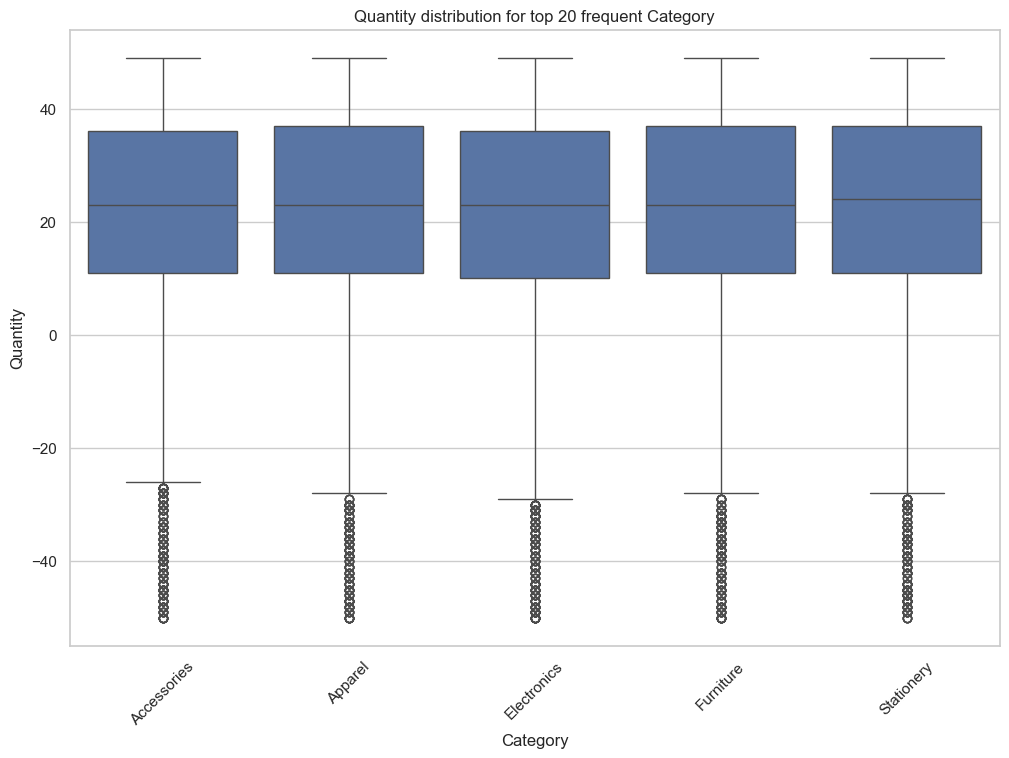

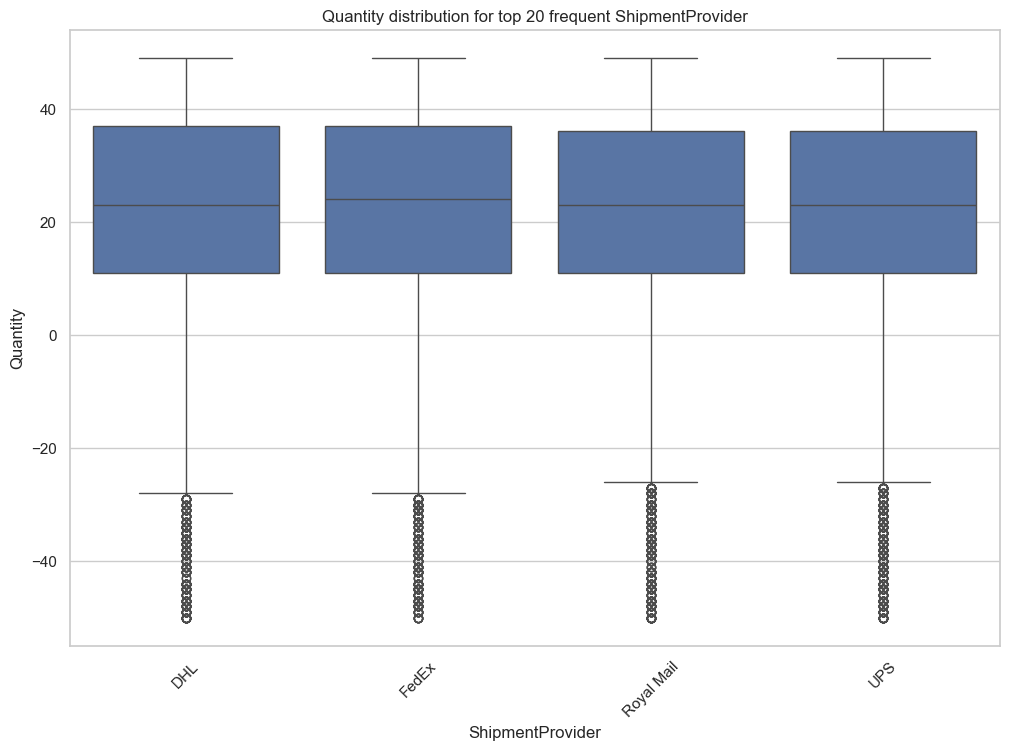

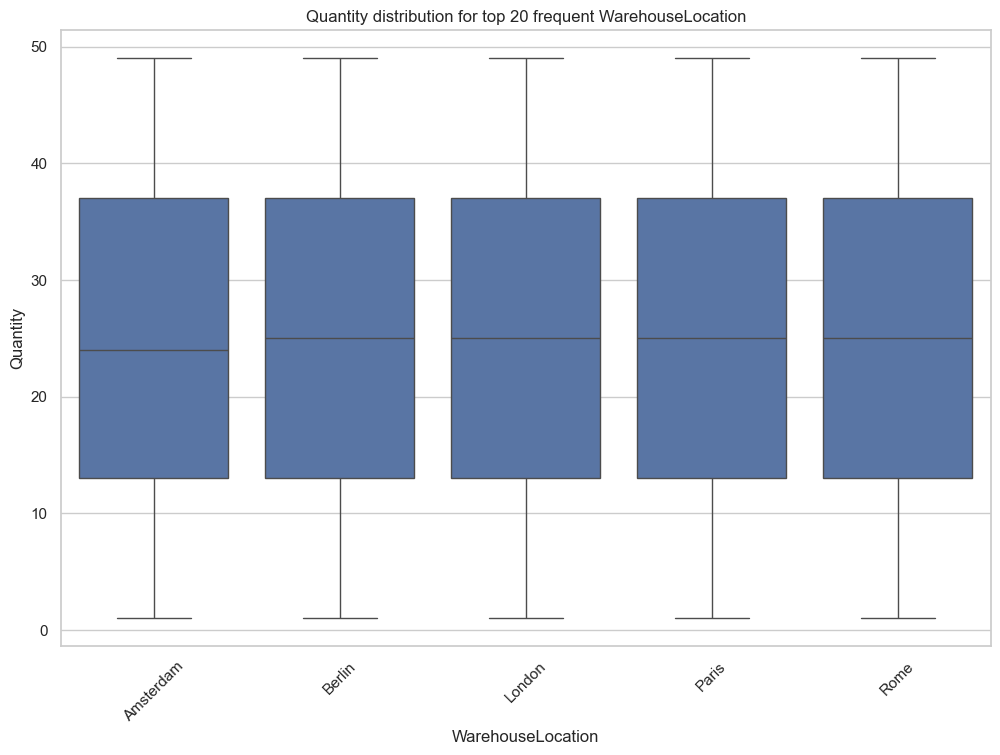

In [53]:
# List of categorical columns to analyze

for col in categorical_columns:
    # Find the top 20 categories in each column based on frequency
    top_20_categories = df[col].value_counts().head(20).index
    
    # Filter the DataFrame to only include rows where the category is in the top 20 for the current column
    filtered_df = df[df[col].isin(top_20_categories)]
    
    # Plotting
    plt.figure(figsize=(12, 8))
    sns.boxplot(x=col, y='Quantity', data=filtered_df)
    plt.title(f'Quantity distribution for top 20 frequent {col}')
    plt.xticks(rotation=45)  # Rotate labels for better readability
    plt.show()


# 4. Data Cleaning

Data cleaning is a critical step in the machine learning pipeline. The steps of data cleaning are as below:

 1. Missing value imputation
 2. Removing outliers

# ・Missing Values Imputation

In missing value imputation, for distinct columns within the dataset, tailored strategies for imputing missing values are essential, considering the unique characteristics of each column. Here's a refined approach based on the column types:

1. "ShippingCost": Given that their distributions lean towards the right, indicating a skewness, median method will be applied for imputation to prevent the overall structure from being affected by the extreme values. 

2. "WarehouseLocation": This column lacks detailed descriptive information that could guide a straightforward imputation, poses a challenge. Here, employing a K-Nearest Neighbors (KNN) imputation strategy is suitable. KNN can find the most similar entries (nearest neighbors) based on other features within the dataset.

In [55]:
# Check the missing values and data types in the data frame
print(df.isnull().sum())
print(df.info()) 

Description             0
Quantity                0
Year                    0
Quarter                 0
Month                   0
DateofWeek              0
Hour                    0
UnitPrice               0
Country                 0
Discount                0
PaymentMethod           0
ShippingCost         2143
Category                0
ShipmentProvider        0
WarehouseLocation    3038
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43825 entries, 0 to 43824
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Description        43825 non-null  category
 1   Quantity           43825 non-null  int64   
 2   Year               43825 non-null  category
 3   Quarter            43825 non-null  category
 4   Month              43825 non-null  category
 5   DateofWeek         43825 non-null  category
 6   Hour               43825 non-null  category
 7   UnitPrice          43825 non-null  float64

### 1. "ShippingCost"

For numerical columns as "ShippingCost", median-method will be used to impute the missing values for the robustness of the distribution.

In [67]:
descriptive_stats = df[['ShippingCost']].describe()
median_row = pd.DataFrame(df[['ShippingCost']].median().rename('median')).T
descriptive_stats = pd.concat([descriptive_stats, median_row])

descriptive_stats


,ShippingCost
count,41682.000000
mean,17.491050
std,7.216277
min,5.000000
25%,11.222500
50%,17.480000
75%,23.720000
max,30.000000
median,17.480000


In [68]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Initialize the imputer for median imputation
imputer = SimpleImputer(strategy='median')

# Specify the columns you want to impute
columns_to_impute = ['ShippingCost']

# Perform the imputation on the specified columns
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])


In [70]:
# Display the number of missing values in the cleaned DataFrame to verify the imputation
df.isnull().sum()

Description             0
Quantity                0
Year                    0
Quarter                 0
Month                   0
DateofWeek              0
Hour                    0
UnitPrice               0
Country                 0
Discount                0
PaymentMethod           0
ShippingCost            0
Category                0
ShipmentProvider        0
WarehouseLocation    3038
dtype: int64

In [115]:
# Create a new dataset
df_cleaned = df.copy()
df_cleaned.isnull().sum()

Description             0
Quantity                0
Year                    0
Quarter                 0
Month                   0
DateofWeek              0
Hour                    0
UnitPrice               0
Country                 0
Discount                0
PaymentMethod           0
ShippingCost            0
Category                0
ShipmentProvider        0
WarehouseLocation    3038
dtype: int64

### 2. "WarehouseLocation": K-Nearest Neighbors (KNN) Imputation
K-Nearest Neighbors (KNN) will be used for imputing missing categorical values for several reasons below:

- Flexibility with Categorical Data: KNN is inherently flexible and can be adapted for use with categorical data, making it suitable for imputing missing values in categorical columns.
- Captures Data Complexity: By considering the nearest neighbors, KNN can capture the complex relationships between features in a dataset. This is particularly useful when the category to be imputed is likely influenced by selected features.
- Improves Data Accuracy: Imputing missing values with KNN can lead to more accurate datasets, especially when the relationships between variables are nonlinear and complex.

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.metrics import accuracy_score

# # Perform one-hot encoding on categorical features
# ohe = OneHotEncoder(sparse_output = False)
# X_encoded = ohe.fit_transform(df_cleaned[['Country', 'Category', 'ShipmentProvider', 'PaymentMethod']])

# # Combine the one-hot encoded features
# X = X_encoded
# y = df_cleaned['WarehouseLocation']

# # Separate the samples into those with and without missing values
# mask = y.isnull()
# X_with_quantity = X[~mask]
# y_with_quantity = y[~mask]

# # Further split the data with known values into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X_with_quantity, y_with_quantity, test_size=0.2, random_state=42)

# # Use the KNN classifier
# knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(X_train, y_train)

# # Predict on the test set
# y_pred = knn.predict(X_test)

In [ ]:
# from sklearn.metrics import accuracy_score

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy:.2f}")

# # After evaluating, proceed with predicting missing 'quantity' values
# X_without_quantity = X[mask]
# predicted_quantity = knn.predict(X_without_quantity)
# df_cleaned.loc[mask, 'Quantity'] = predicted_quantity

# y.value_counts(normalize=True)

Accuracy: 0.20


WarehouseLocation
Amsterdam    0.204943
London       0.199598
Rome         0.199598
Berlin       0.198911
Paris        0.196950
Name: proportion, dtype: float64

In [116]:
# 找出 WarehouseLocation 的眾數（最常出現的地點）
most_common_location = df_cleaned['WarehouseLocation'].mode()[0]

# 用眾數填補缺失值
df_cleaned['WarehouseLocation'] = df_cleaned['WarehouseLocation'].fillna(most_common_location)

### Comment:
From the accuracy it is known that adding more features to predict "variety" will not affect the result, so the selected features in this KNN model are only "region_2" and "winery".

In [117]:
# Verify the changes by checking if there are any missing values left in 'variety'
df_cleaned.isnull().sum()

Description          0
Quantity             0
Year                 0
Quarter              0
Month                0
DateofWeek           0
Hour                 0
UnitPrice            0
Country              0
Discount             0
PaymentMethod        0
ShippingCost         0
Category             0
ShipmentProvider     0
WarehouseLocation    0
dtype: int64

# ・Remove Outliers

From the right-skewed distribution of "price", it is implied that some values are outliers from the rest of the data, so there is a need to delete them to ensure a more effective prediction.

Here the Interquartile Range (IQR) method is used for identifying and removing outliers, which is a common statistical approach.

In [118]:
# Calculate Q1, Q3, and IQR for 'UnitPrice'
Q1_UnitPrice = df_cleaned['UnitPrice'].quantile(0.25)
Q3_UnitPrice = df_cleaned['UnitPrice'].quantile(0.75)
IQR_UnitPrice = Q3_UnitPrice - Q1_UnitPrice

# Identify outliers for 'UnitPrice' based on the 1.5*IQR rule
outliers_UnitPrice_indices = df_cleaned[(df_cleaned['UnitPrice'] < (Q1_UnitPrice - 1.5 * IQR_UnitPrice)) | 
                                      (df_cleaned['UnitPrice'] > (Q3_UnitPrice + 1.5 * IQR_UnitPrice))].index

# Remove 'UnitPrice' outliers
df_cleaned = df_cleaned.drop(outliers_UnitPrice_indices)

# For 'score', instead of automatic removal, perform a review or adjustment
# Calculate Q1, Q3, and IQR for 'score'
#Q1_score = df_cleaned['score'].quantile(0.25)
#Q3_score = df_cleaned['score'].quantile(0.75)
#IQR_score = Q3_score - Q1_score

# Identify potential outliers for 'score'
#potential_outliers_score = df_cleaned[(df_cleaned['score'] < (Q1_score - 1.5 * IQR_score)) | 
#                                       (df_cleaned['score'] > (Q3_score + 1.5 * IQR_score))]


### Comment:
Here it is proved that removing outliers from "quantity" will lead to a fall in the performance of the models, so the best strategy is to only remove the outliers from "price" for numerical features.

In [119]:
#Verify the result by checking missing values
df_cleaned.isnull().sum()

Description          0
Quantity             0
Year                 0
Quarter              0
Month                0
DateofWeek           0
Hour                 0
UnitPrice            0
Country              0
Discount             0
PaymentMethod        0
ShippingCost         0
Category             0
ShipmentProvider     0
WarehouseLocation    0
dtype: int64

In [120]:
# Present the correlation coefficient between 'Quantity' and 'ShippingCost'
correlation = df_cleaned['Quantity'].corr(df_cleaned['ShippingCost'])
print(f"The correlation coefficient between Quantity and ShippingCost is: {correlation:.2f}")

df_cleaned.describe()

The correlation coefficient between Quantity and ShippingCost is: -0.00


,Quantity,UnitPrice,Discount,ShippingCost
count,43166.000000,43166.000000,43166.000000,43166.000000
mean,23.126535,49.379718,0.262791,17.490670
std,16.900512,29.875186,0.190124,7.091146
min,-50.000000,-52.670000,0.000000,5.000000
25%,11.000000,24.720000,0.130000,11.440000
50%,24.000000,49.480000,0.250000,17.480000
75%,37.000000,74.850000,0.380000,23.510000
max,49.000000,100.000000,1.999764,30.000000


In [121]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43166 entries, 0 to 43824
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Description        43166 non-null  category
 1   Quantity           43166 non-null  int64   
 2   Year               43166 non-null  category
 3   Quarter            43166 non-null  category
 4   Month              43166 non-null  category
 5   DateofWeek         43166 non-null  category
 6   Hour               43166 non-null  category
 7   UnitPrice          43166 non-null  float64 
 8   Country            43166 non-null  category
 9   Discount           43166 non-null  float64 
 10  PaymentMethod      43166 non-null  category
 11  ShippingCost       43166 non-null  float64 
 12  Category           43166 non-null  category
 13  ShipmentProvider   43166 non-null  category
 14  WarehouseLocation  43166 non-null  category
dtypes: category(11), float64(3), int64(1)
memory usage: 2.1 MB

### Comment:
The rise of correlation coefficient proves that removing outliers indeed eliminates some noise in their relationship.

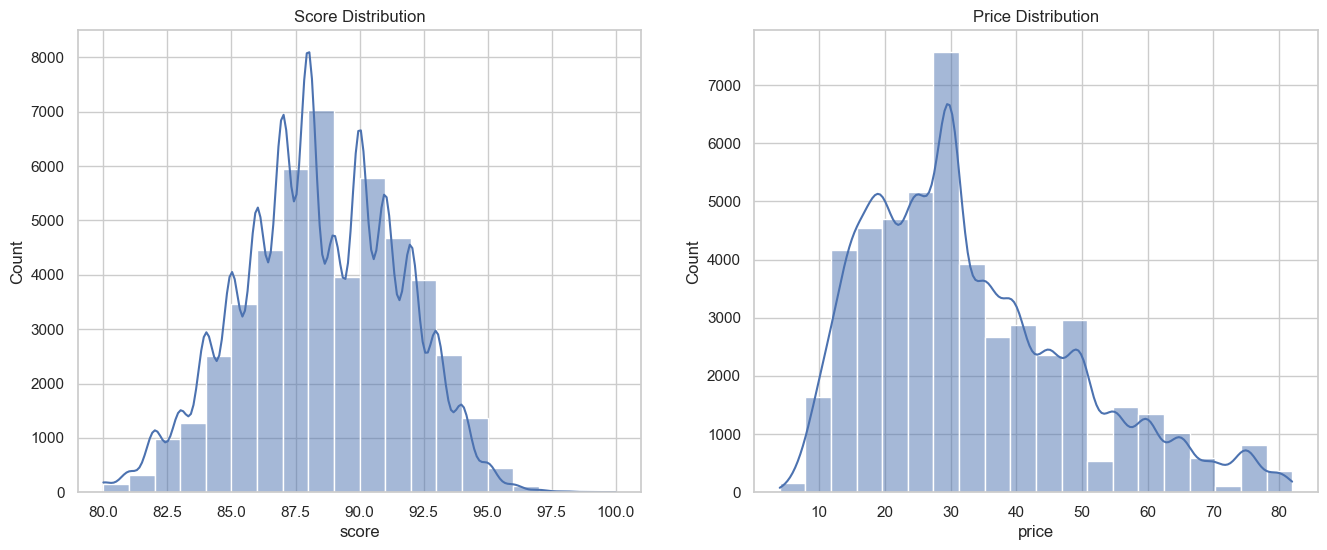

In [31]:
# Verify the changes by checking the shape of distributions

# Set the style of seaborn
sns.set(style="whitegrid")

# Numerical columns: 'score' and 'price'
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Histograms for score and price
sns.histplot(wine_cleaned['score'].dropna(), bins=20, kde=True, ax=ax[0])
ax[0].set_title('Score Distribution')

sns.histplot(wine_cleaned['price'].dropna(), bins=20, kde=True, ax=ax[1])
ax[1].set_title('Price Distribution')

plt.show()


### Comment:
After addressing missing values and removing outliers, the underlying trends within the two crucial numerical datasets—"score" and "price"—can be more accurately represented, devoid of noise. This refinement enhances the quality of predictive analysis by ensuring that the data more reliably reflects genuine patterns, thereby facilitating more trustworthy predictions.

# 5. Feature Engineering

In this step, there will be several elements being done to enhance the quality of the dataset for prediction.

1. "year" Imputation: Feature "year" will be extracted from "title" and processed as a cleaned numerical feature.
2. Removing Irrelevant Features
3. Grouping Data

### ・ "year" Imputation

Considering the impact of vintage on wine quality, the year of production may be a critical attribute that can significantly influence a wine's score. Therefore, the 'year' will be extracted from the 'title' and placed into a new column.

Given the structured nature of the 'title' field, where the 'year' of production typically follows the 'winery' name and is not positioned at the beginning of the string, the extraction process must account for this pattern to accurately identify the 'year'. Thus, the approach will involve selecting sequences of four digits that do not commence the title but instead follow some text, ensuring that the extracted numbers genuinely represent the production year in alignment with the data frame's characteristics.

In [32]:
import re

# Define a function to extract the year from the title
def extract_year(title):
    # Find all four-digit numbers between 1000 and 2024 that are not at the beginning of the string
    matches = re.findall(r'(?<!^)\b(1\d{3}|200\d|201\d|202[0-4])\b', title)
    if matches:
        # Return the first match (not at the beginning)
        return matches[0]
    else:
        # If no matches are found, or the match is at the beginning, return None
        return None

# Apply the function and create a new column for the extracted year
wine_cleaned['year'] = wine_cleaned['title'].apply(extract_year)

# Display the result
print(wine_cleaned.head())



   id                                              title  score  price  \
0   1         :Nota Bene 2005 Una Notte Red (Washington)   89.0   30.0   
1   2  :Nota Bene 2006 Verhey Vineyard Malbec (Yakima...   89.0   30.0   
2   3  :Nota Bene 2007 Ciel du Cheval Vineyard Syrah ...   91.0   35.0   
3   4  :Nota Bene 2007 Conner Lee Vineyard Merlot (Co...   88.0   32.0   
4   5  :Nota Bene 2007 Conner Lee Vineyard Red (Colum...   88.0   32.0   

        state              region_1          region_2  \
0  Washington            Washington  Washington Other   
1  Washington         Yakima Valley   Columbia Valley   
2  Washington          Red Mountain   Columbia Valley   
3  Washington  Columbia Valley (WA)   Columbia Valley   
4  Washington  Columbia Valley (WA)   Columbia Valley   

                    variety      winery  year  
0                 Red Blend  :Nota Bene  2005  
1                    Malbec  :Nota Bene  2006  
2                     Syrah  :Nota Bene  2007  
3                   

In [33]:
# Examine missing values resulted from the last step
wine_cleaned.isnull().sum()

id            0
title         0
score         0
price         0
state         0
region_1      0
region_2      0
variety       0
winery        0
year        859
dtype: int64

### Comment:
To address missing values in the 'year' column, the optimal strategy is to impute these gaps with the 'median' value. This approach is preferred over using the 'mean' because it guarantees that the structure of "year" will remain stable, not to be affected by outliers.

In [34]:
# Convert the 'year' column to numeric, and invalid parsing will be set as NaN
wine_cleaned['year'] = pd.to_numeric(wine_cleaned['year'], errors='coerce')

# Calculate the median of the 'year' column, excluding NaN values
year_median = wine_cleaned['year'].median()

# Impute missing values in 'year' with the median
wine_cleaned['year'].fillna(year_median, inplace=True)

# Display the result to verify the imputation
print(wine_cleaned)

          id                                              title  score  price  \
0          1         :Nota Bene 2005 Una Notte Red (Washington)   89.0   30.0   
1          2  :Nota Bene 2006 Verhey Vineyard Malbec (Yakima...   89.0   30.0   
2          3  :Nota Bene 2007 Ciel du Cheval Vineyard Syrah ...   91.0   35.0   
3          4  :Nota Bene 2007 Conner Lee Vineyard Merlot (Co...   88.0   32.0   
4          5  :Nota Bene 2007 Conner Lee Vineyard Red (Colum...   88.0   32.0   
...      ...                                                ...    ...    ...   
54498  54499              Zucca 2006 Barbera (Sierra Foothills)   83.0   28.0   
54499  54500  Zucca 2009 Canterbury Vineyards Malbec (Calave...   83.0   28.0   
54500  54501  Zucca 2010 Sangiovese Rosato Rosé (Amador County)   87.0   18.0   
54501  54502  Zynthesis 2009 Old Vine Zinfandel Zinfandel (L...   84.0   11.0   
54502  54503                    Zynthesis 2011 Zinfandel (Lodi)   86.0   11.0   

            state          

In [35]:
# Convert 'year' column to integer
wine_cleaned['year'] = wine_cleaned['year'].astype(int)

In [36]:
# Verify the change of the data type
wine_cleaned.describe()

,id,score,price,year
count,48993.000000,48993.000000,48993.000000,48993.000000
mean,27317.531443,88.402629,32.738799,2010.495683
std,15740.118935,3.060228,15.843073,6.162303
min,1.000000,80.000000,4.000000,1621.000000
25%,13684.000000,86.000000,20.000000,2009.000000
50%,27401.000000,88.000000,30.000000,2011.000000
75%,40947.000000,91.000000,42.000000,2013.000000
max,54503.000000,100.000000,82.000000,2016.000000


In [37]:
# Verify the result of the imputation 
wine_cleaned.isnull().sum()

id          0
title       0
score       0
price       0
state       0
region_1    0
region_2    0
variety     0
winery      0
year        0
dtype: int64

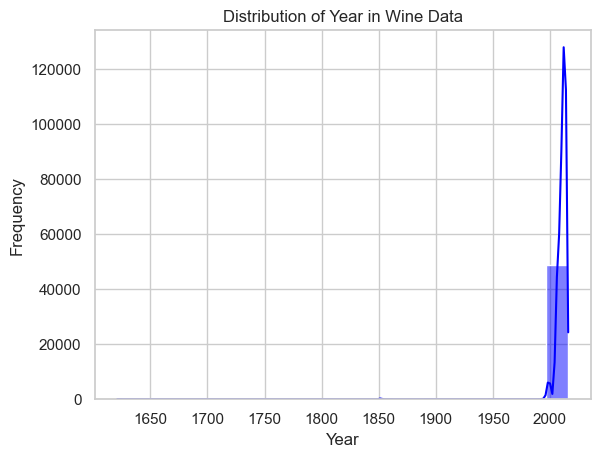

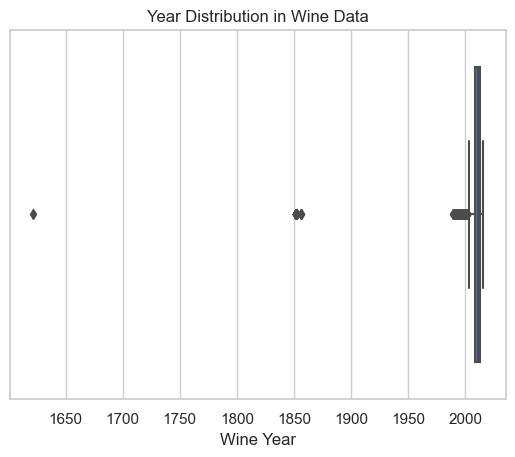

In [38]:
import seaborn as sns

# Histogram of 'year'
sns.histplot(wine_cleaned['year'].dropna(), bins=20, kde=True, color='blue')
plt.title('Distribution of Year in Wine Data')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

# Box Plot of 'year'
sns.boxplot(x=wine_cleaned['year'])
plt.title('Year Distribution in Wine Data')
plt.xlabel('Wine Year')
plt.show()

In [39]:
# Examine the correlation coefficient of 'year' to 'score'
correlation_coefficient_year_score = wine_cleaned['year'].corr(wine_cleaned['score'])
correlation_coefficient_year_score

0.11050531482135678

### Comment:
From the above distribution of "year", it is clear that there are considerable noises in "year". Concerning the significant relationship for "year" to "score", removing outliers is indicated as an important step here. 

In [40]:
import pandas as pd

# Assuming 'wine_cleaned' is your DataFrame and 'year' is the column of interest
Q1 = wine_cleaned['year'].quantile(0.25)
Q3 = wine_cleaned['year'].quantile(0.75)
IQR = Q3 - Q1

# Defining outliers as those beyond 1.5 times the IQR from the Q1 or Q3
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering out the outliers
wine_cleaned = wine_cleaned[(wine_cleaned['year'] >= lower_bound) & (wine_cleaned['year'] <= upper_bound)]


Visualize the distribution and box plot of the "year" column without outliers.

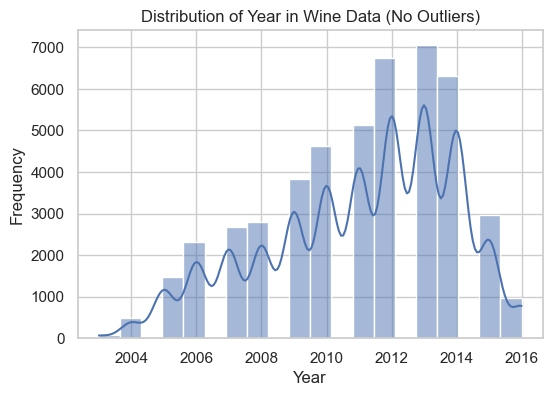

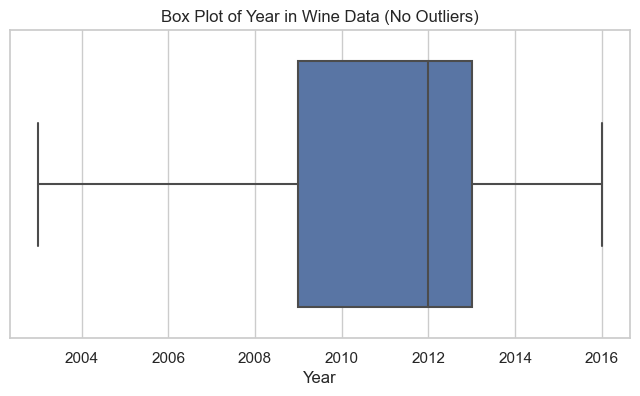

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of 'year' without outliers
plt.figure(figsize=(6, 4))
sns.histplot(wine_cleaned['year'], bins=20, kde=True)
plt.title('Distribution of Year in Wine Data (No Outliers)')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

# Box plot of 'year' without outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=wine_cleaned['year'])
plt.title('Box Plot of Year in Wine Data (No Outliers)')
plt.xlabel('Year')
plt.show()


Compute the correlation coefficient between "year" and "score" without outliers

In [42]:
correlation_coefficient = wine_cleaned['year'].corr(wine_cleaned['score'])
print(f"Correlation Coefficient between Year and Score (No Outliers): {correlation_coefficient}")

Correlation Coefficient between Year and Score (No Outliers): 0.18801545570393496


### Comment:
The result that the rise of correlation coefficient of "year" from 0.11 to 0.188 varifies the meaningfulness of removing outliers, and this can be an important feature to support the model prediction.  

### ・Drop Irrelevant Values

In this dataset, "id" and "target" are two irrelevant columns to the prediction, so it is a need to delect them in avoiding noise.

In [43]:
# Dropping the 'id' and 'title'columns from the 'wine_cleaned' DataFrame
wine_cleaned = wine_cleaned.drop(columns=['id','title'])
wine_cleaned.isnull().sum()

score       0
price       0
state       0
region_1    0
region_2    0
variety     0
winery      0
year        0
dtype: int64

### ・Group values

Grouping values that are appearing at rather low frequency in categorical variables such as "region_1", "variety" and "winery" in a dataset can significantly simplify the complexity to avoid the curse of dimensionality, so that the models will not struggle to learn efficiently.

Noticeably, the low-frequency values in the feature "state" will not be grouped, because the number of the types in "state" is only around 30 and the box plot part in EDA presents the considerable relationship of "state" with "score".

In [44]:
# Display the DataFrame
print(wine_cleaned['region_1'].nunique())
print(wine_cleaned['variety'].nunique())
print(wine_cleaned['winery'].nunique())

262
247
5125


In [45]:
import pandas as pd

# Replaces categories in a specified column of the DataFrame,  
# which have fewer than a specified number of occurrences with a new category label
def replace_infrequent_categories(data, column_name, threshold=5, new_value_suffix='others'):
    """
    Parameters:
    - data: pandas.DataFrame containing the data.
    - column_name: str, the name of the column to process.
    - threshold: int, the minimum number of occurrences required to keep the category (default 5).
    - new_value_suffix: str, suffix for the new category label for infrequent categories.

    Returns:
    - None, modifies the DataFrame in place.
    """
    counts = data[column_name].value_counts()
    less_than_threshold = counts[counts < threshold].index
    new_value = f"{column_name}_{new_value_suffix}"
    data[column_name] = data[column_name].apply(lambda x: new_value if x in less_than_threshold else x)

# Replace infrequent categories
replace_infrequent_categories(wine_cleaned, 'region_1')
replace_infrequent_categories(wine_cleaned, 'variety')
replace_infrequent_categories(wine_cleaned, 'winery')

# Display the modified DataFrame unique counts for validation
print(f"Unique 'region_1': {wine_cleaned['region_1'].nunique()}")
print(f"Unique 'variety': {wine_cleaned['variety'].nunique()}")
print(f"Unique 'winery': {wine_cleaned['winery'].nunique()}")


Unique 'region_1': 191
Unique 'variety': 131
Unique 'winery': 2368


In [46]:
region_1_counts = wine_cleaned['region_1'].value_counts()
region_1_others_count = region_1_counts['region_1_others']

variety_counts = wine_cleaned['variety'].value_counts()
variety_others_count = variety_counts['variety_others']

winery_counts = wine_cleaned['winery'].value_counts()
winery_others_count = winery_counts['winery_others']

print("Number of region_1_others:", region_1_others_count)
print("Number of variety_others:", variety_others_count)
print("Number of winery_others:", winery_others_count)

Number of region_1_others: 154
Number of variety_others: 204
Number of winery_others: 5616


# 6. Feature Selection

For feature selection, both numerical and categorical data will be put together using Random Forest Regressor. 

### ・Random Forest Regressor for Feature Selection

The Random Forest Regressor evaluates the contribution of each feature to the prediction accuracy across all trees, thereby identifying the most significant features. This method is particularly beneficial as it naturally handles categorical variables, without the need for extensive preprocessing or dummy variable creation.

### The reason to choose Random Forest Regressor to do feature selection but not PCA
The Random Forest Regressor offers several advantages over Principal Component Analysis (PCA) when it comes to feature selection and handling categorical data, particularly in predictive modeling tasks:

1. Non-Linear Relationships: Random Forest can capture non-linear relationships between features and the target variable, but PCA operates under the assumption that the data's primary structure is linear, potentially leading to the neglect of noise and outlier effects. This makes Random Forest more versatile in dealing with complex data structures.

2. Categorical Data Handling: Random Forest can naturally handle categorical variables without the need for converting them into numerical values through one-hot encoding or similar preprocessing steps. PCA, on the other hand, generally requires numerical inputs, and the process of encoding can lead to a high-dimensional dataset if the categorical variables have many levels.

3. Feature Importance: Random Forest provides direct insights into feature importance based on how each feature improves the model's performance. This is crucial for feature selection, as it allows for the identification of the most significant features. PCA transforms the original features into principal components based on variance, which may not always align with the predictive relevance of the features.

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np

# Define your categorical columns
categorical_columns = ['state', 'region_1', 'region_2', 'variety', 'winery']  # Specify your categorical columns

# Define the encoder and the transformation
column_transformer = ColumnTransformer([
    ('encoder', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
], remainder='passthrough')

# Separate features and target
X = wine_cleaned.drop('score', axis=1)
y = wine_cleaned['score']

# Encode the features
X_encoded = column_transformer.fit_transform(X)
feature_names_encoded = column_transformer.get_feature_names_out()

# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and fit the RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get the feature importances
importances = model.feature_importances_

# Combine feature names and their importances, sort them, and select the top 15
features_importances = sorted(zip(feature_names_encoded, importances), key=lambda x: x[1], reverse=True)[:15]

# Extract just the feature names for the top 15
top_features = [feature for feature, importance in features_importances]

# Print the top 15 features
print("Top 15 Features based on Importance:")
for feature in top_features:
    print(feature)


Top 15 Features based on Importance:
remainder__price
remainder__year
encoder__winery_winery_others
encoder__state_Washington
encoder__region_2_Columbia Valley
encoder__variety_Chardonnay
encoder__state_Virginia
encoder__variety_Cabernet Sauvignon
encoder__variety_Pinot Noir
encoder__region_2_Central Coast
encoder__variety_Syrah
encoder__variety_Red Blend
encoder__region_2_Napa
encoder__variety_Zinfandel
encoder__region_1_Paso Robles


### Comment:
When selecting 20 features, it is implied by the learning curve that the final model suffers overfitting, but choosing 10 features will lower R-squared significantly arond 10 percent. Therefore, by experimentation, 15 features can be a good selection to meet the blance between shrinking overfitting and raising R-squared.

In [48]:
top_features

['remainder__price',
 'remainder__year',
 'encoder__winery_winery_others',
 'encoder__state_Washington',
 'encoder__region_2_Columbia Valley',
 'encoder__variety_Chardonnay',
 'encoder__state_Virginia',
 'encoder__variety_Cabernet Sauvignon',
 'encoder__variety_Pinot Noir',
 'encoder__region_2_Central Coast',
 'encoder__variety_Syrah',
 'encoder__variety_Red Blend',
 'encoder__region_2_Napa',
 'encoder__variety_Zinfandel',
 'encoder__region_1_Paso Robles']

In [49]:
# Trim the first word and underscores
feature_selected = ['__'.join(feature.split('__')[1:]) for feature in top_features]

# Print the trimmed feature names
print("Trimmed Features:")
for feature in feature_selected:
    print(feature)

Trimmed Features:
price
year
winery_winery_others
state_Washington
region_2_Columbia Valley
variety_Chardonnay
state_Virginia
variety_Cabernet Sauvignon
variety_Pinot Noir
region_2_Central Coast
variety_Syrah
variety_Red Blend
region_2_Napa
variety_Zinfandel
region_1_Paso Robles


# 7. Encoding Categorical Variables

This function will automatically handle columns as "state", "region_1", "region_2", "winery", and "variety" and leave all other numerical columns unchanged.

The decision against using label encoding stems from the absence of any ordinal relationship among the values within these features. For one-hot encoding, it avoids imposing an artificial order on the data and ensures that the modeling process more accurately reflects the underlying relationships between features and the target variable "score".

### ・One-Hot Encoding

In [50]:
from sklearn.preprocessing import OneHotEncoder

# Identifying categorical columns in 'wine_cleaned'
categorical_cols = wine_cleaned.select_dtypes(include=['object']).columns.tolist()

# Initializing the OneHotEncoder
ohe = OneHotEncoder(sparse=False, drop='first')  # `drop='first'` to avoid dummy variable trap

# Fitting and transforming the categorical columns
# Note: `.fit_transform()` expects a 2D array, hence the double brackets `[[column]]`
encoded_data = ohe.fit_transform(wine_cleaned[categorical_cols])

# Creating a DataFrame with the encoded data
# `get_feature_names_out()` gives new column names
encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out(categorical_cols))

# Concatenating the encoded_df with the original DataFrame (minus the categorical columns)
wine_cleaned_numeric = wine_cleaned.drop(columns=categorical_cols)
wine_encoded = pd.concat([wine_cleaned_numeric.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

# Display the first few rows to verify
print(wine_encoded.head())


/Users/louise87121/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


   score  price  year  state_Arizona  state_CA  state_California  \
0   89.0   30.0  2005            0.0       0.0               0.0   
1   89.0   30.0  2006            0.0       0.0               0.0   
2   91.0   35.0  2007            0.0       0.0               0.0   
3   88.0   32.0  2007            0.0       0.0               0.0   
4   88.0   32.0  2007            0.0       0.0               0.0   

   state_Colorado  state_Connecticut  state_Hawaii  state_Idaho  ...  \
0             0.0                0.0           0.0          0.0  ...   
1             0.0                0.0           0.0          0.0  ...   
2             0.0                0.0           0.0          0.0  ...   
3             0.0                0.0           0.0          0.0  ...   
4             0.0                0.0           0.0          0.0  ...   

   winery_rys  winery_t. Julian  winery_te. Chapelle  winery_ujishin  \
0         0.0               0.0                  0.0             0.0   
1         0.0 

In [51]:
# Verify the result
wine_encoded.isnull().sum( )

score                   0
price                   0
year                    0
state_Arizona           0
state_CA                0
                       ..
winery_uston            0
winery_winery_others    0
winery_yncroft          0
winery_Écluse           0
winery_àMaurice         0
Length: 2793, dtype: int64

In [52]:
# Check the types of data
wine_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47447 entries, 0 to 47446
Columns: 2793 entries, score to winery_àMaurice
dtypes: float64(2792), int64(1)
memory usage: 1011.0 MB


### ・Create "wine_selected" data frame

Turn the result from one-hot encoding to a new data frame "wine_selected" which contains only the selected features to undergo model training.

In [53]:
# Include 'score' in the data frame
wine_selected = wine_encoded[feature_selected]
wine_selected['score'] = wine_encoded['score']
wine_selected.head()

/var/folders/b4/5wdlnrr10r34hg_ycwcqq_km0000gn/T/ipykernel_68345/3320867863.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_selected['score'] = wine_encoded['score']


,price,year,winery_winery_others,state_Washington,region_2_Columbia Valley,variety_Chardonnay,state_Virginia,variety_Cabernet Sauvignon,variety_Pinot Noir,region_2_Central Coast,variety_Syrah,variety_Red Blend,region_2_Napa,variety_Zinfandel,region_1_Paso Robles,score
0,30.0,2005,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,89.0
1,30.0,2006,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.0
2,35.0,2007,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,91.0
3,32.0,2007,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88.0
4,32.0,2007,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88.0


In [54]:
# Examine the data frame by exporting it
wine_selected.to_csv('wine_selected.csv', index=False)

### ・Heat Map: examine the relationship of selected features

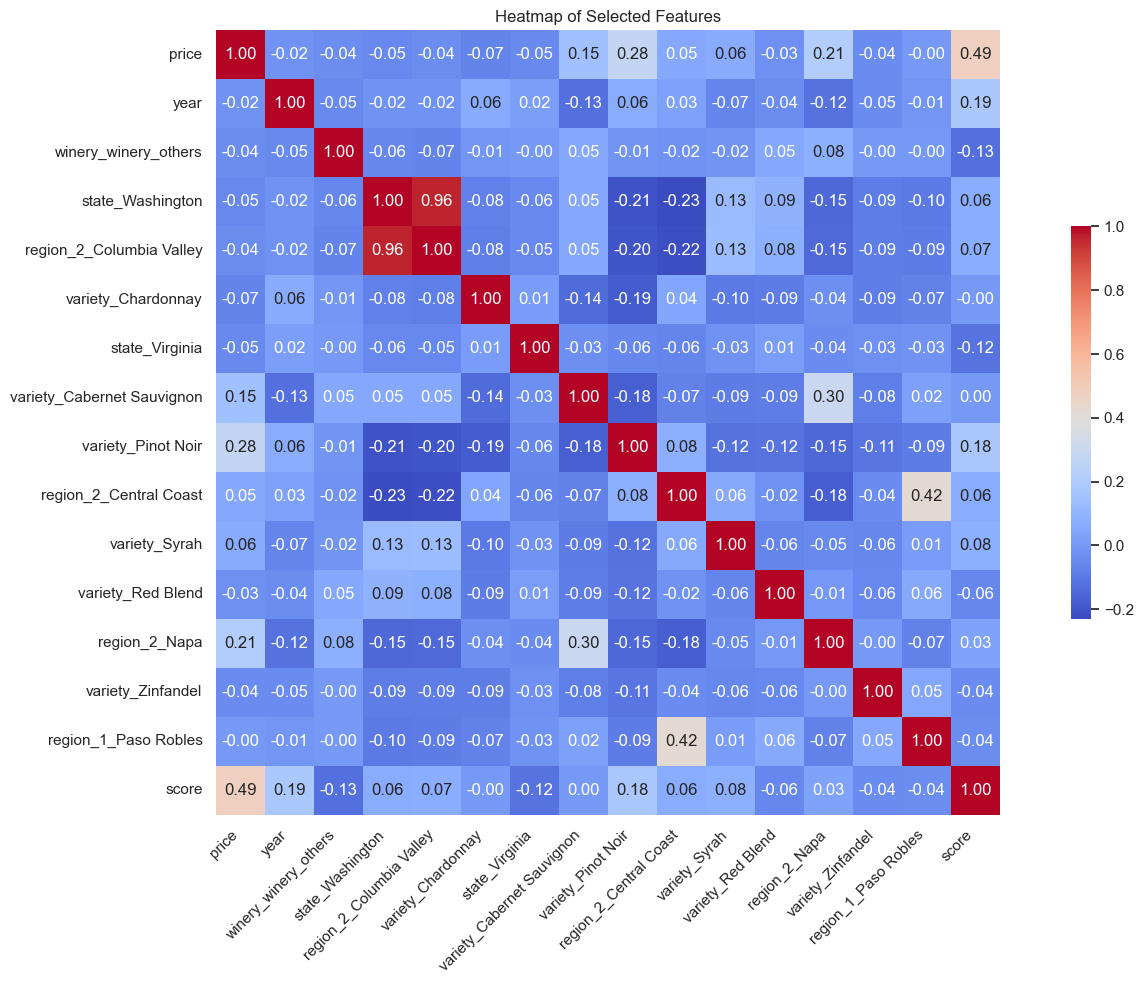

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = wine_selected.corr()

# Generate a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={'shrink': .5})
plt.title('Heatmap of Selected Features')
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# 8. Machine Learning Models

### ・Decision Tree

Using a Decision Tree model for predicting wine scores in the wine project offers several advantages, making it a compelling choice for this task. The three most important reasons to consider a Decision Tree include:

1. Interpretability: Decision Trees provide clear visualization and understanding of how decisions are made, making it easier for stakeholders to follow the logic behind each prediction.

2. Handles Non-linear Relationships: Decision Trees are non-parametric, meaning they do not assume any underlying relationship between features and the target variable. This capability allows them to capture non-linear relationships between the characteristics of wine and its score.

3. Feature Importance: Decision Trees naturally provide insights into which features are most influential in predicting the score. This information can be crucial for winemakers and marketers to understand which aspects as "variety", "region", and "winery") most significantly impact its quality assessment, guiding strategic decisions in production and marketing.

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = wine_selected.drop('score', axis=1)
y = wine_selected['score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 8.25124911927521
Root Mean Squared Error (RMSE): 2.8724987587943724
R-squared (R²): 0.1341052430765105


### ・Ensemble

To refine the random forest model, the ensemble method will be used here, including bagging, boosting, and stacking.

1. Bagging: Random Forest Model
2. Boosting: Gradient Boosting Model
3. Stacking: Combination of Random Forest and Gradient Boosting Models

Overall outcome of the usage of Ensemble methods:
1. Improved Accuracy: It leads to better predictive performance than any single model.
2. Reduced Overfitting: Techniques like bagging and boosting can mitigate overfitting by averaging multiple models' predictions or by sequentially correcting for overfit to the training data.
3. Handling Variance and Bias: Ensemble methods can balance the trade-off between bias and variance, reducing errors associated with each.

### 1. Bagging: Random Forest Model

Random Forest is an ensemble learning method, Bagging.

By applying bagging to refine Decision Tree Model into a Random Forest, the power of multiple trees will be leveraged to create a more robust model that addresses the key limitations of a single decision tree, such as overfitting and high variance. 

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = wine_selected.drop('score', axis=1)
y = wine_selected['score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate R-squared
RF_r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {RF_r2}")

Mean Squared Error (MSE): 7.1528383621123375
Root Mean Squared Error (RMSE): 2.6744790823845186
R-squared (R²): 0.2493736226669253


### 2. Boosting: Gradient Boosting Machines (GBM)

Boosting is a sequential ensemble technique that combines multiple weak learners to form a strong learner, aiming to improve the accuracy and performance of the model. Unlike bagging methods like Random Forest, which train multiple models in parallel and combine their predictions, boosting focuses on training models sequentially, with each model learning from the mistakes of its predecessors.

Boosting can significantly improve the performance of Decision Trees and Random Forest models by focusing on reducing both bias and variance through its iterative correction process. It makes these models more adaptable to complex datasets with intricate patterns, leading to more accurate and robust predictive models. 

However, the success of boosting methods depends on careful tuning of their parameters, including the learning rate and the number of iterations, to prevent overfitting and ensure optimal performance.

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = wine_selected.drop('score', axis=1)
y = wine_selected['score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate R-squared (R²)
GB_r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {GB_r2}")

Mean Squared Error (MSE): 6.225039205710607
Root Mean Squared Error (RMSE): 2.495002846834169
R-squared (R²): 0.34673784151344866


### 3. Stacking: combine random forest and GBM models

Stacking models, involves combining multiple predictive models to improve the accuracy of predictions. 

The main advantage of this technique is that it leverages the strengths of multiple models to achieve better performance than any single model could on its own. This is particularly useful in reducing bias and variance, leading to more robust and reliable predictions.

Here Random Forest Model and GBM Model will be combined as the Stacking Model, in order to raise the performance of the prediction.

In [59]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train base models (Random Forest and Gradient Boosting)
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Generate predictions from base models
rf_predictions = rf_model.predict(X_test)
gb_predictions = gb_model.predict(X_test)

# Combine predictions as input to meta-model
meta_features = np.column_stack((rf_predictions, gb_predictions, X_test))

# Initialize and train the meta-model (e.g., Linear Regression)
meta_model = LinearRegression()
meta_model.fit(meta_features, y_test)

# Make final predictions using meta-model
final_predictions = meta_model.predict(meta_features)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, final_predictions)
print("MSE:", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Calculate R-squared (R²)
stacking_r2 = r2_score(y_test, final_predictions)
print("R-squared:", stacking_r2)



MSE: 6.173990440864721
RMSE: 2.4847515853430338
R-squared: 0.352094952562758


Here is the bar chart containing all R-squared from the Ensemble Models above. 

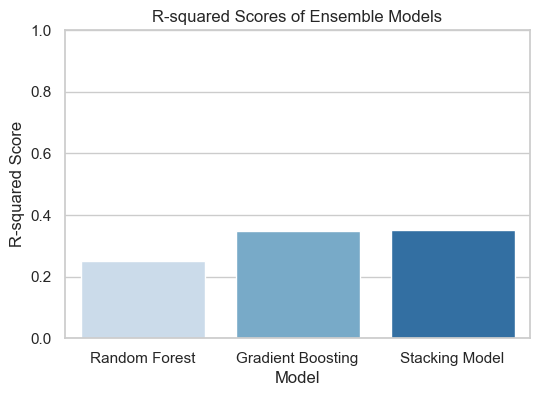

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming RF_r2, GB_r2, and stacking_r2 are your R-squared scores
# Replace these with the actual scores
r2_scores = [RF_r2, GB_r2, stacking_r2]  
models = ['Random Forest', 'Gradient Boosting', 'Stacking Model']

# Convert to DataFrame for seaborn
data = pd.DataFrame({
    'Model': models,
    'R-squared Score': r2_scores
})

# Create the bar chart using seaborn
plt.figure(figsize=(6, 4))
sns.barplot(x='Model', y='R-squared Score', data=data, palette='Blues')

plt.title('R-squared Scores of Ensemble Models')
plt.xlabel('Model')
plt.ylabel('R-squared Score')
plt.ylim([0, 1])
plt.show()


From this form it is known that the R-squared of the stacking model is the most preferred. However, concerning model selection, Cross-Validation should be utilized to examined further.

# 9. Model Selection

### ・ K-Fold Cross-Validation

Cross-validation is a statistical method used to estimate the skill of machine learning models, primarily used to assess how the results of a statistical analysis will generalize to an independent data set. 

Here there will be 3 models to assess using K-Fold Cross Validation:

1. Random Forest Model
2. Gradient Boosting Machines Model
3. Stacking Model

### Random Forest Cross Validation

In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive values
cv_scores = -cv_scores

# Calculate Mean and Standard Deviation of MSE scores
mean_mse = np.mean(cv_scores)
std_mse = np.std(cv_scores)

print("Cross-Validation MSE Scores:", cv_scores)
print("Mean MSE:", mean_mse)
print("Standard Deviation MSE:", std_mse)


Cross-Validation MSE Scores: [6.8231657  7.43272478 7.08184639 7.28736816 7.40456637]
Mean MSE: 7.205934280302576
Standard Deviation MSE: 0.22778485666725842


### GBM Model Cross Validation

In [62]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor

# Assuming X and y are your features and target variable, respectively
# Initialize the Gradient Boosting Regressor model
gbm_model = GradientBoostingRegressor(random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(gbm_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive values
cv_scores = -cv_scores

# Calculate Mean and Standard Deviation of MSE scores
mean_mse = np.mean(cv_scores)
std_mse = np.std(cv_scores)

print("Cross-Validation MSE Scores:", cv_scores)
print("Mean MSE:", mean_mse)
print("Standard Deviation MSE:", std_mse)


Cross-Validation MSE Scores: [5.77718065 6.24547655 6.10224894 6.10763782 6.28253118]
Mean MSE: 6.103015029274049
Standard Deviation MSE: 0.17816359482955563


### Stacking Model Cross Validation

In [63]:
from sklearn.model_selection import cross_val_score

# Initialize and train the base models (Random Forest and Gradient Boosting)
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)
rf_model.fit(X, y)
gb_model.fit(X, y)

# Generate predictions from base models
rf_predictions = rf_model.predict(X)
gb_predictions = gb_model.predict(X)

# Combine predictions as input to meta-model
meta_features = np.column_stack((rf_predictions, gb_predictions, X))

# Initialize the meta-model (Linear Regression)
meta_model = LinearRegression()

# Perform cross-validation
cv_scores = cross_val_score(meta_model, meta_features, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive values
cv_scores = -cv_scores

# Calculate Mean and Standard Deviation of MSE scores
mean_mse = np.mean(cv_scores)
std_mse = np.std(cv_scores)

print("Cross-Validation MSE Scores:", cv_scores)
print("Mean MSE:", mean_mse)
print("Standard Deviation MSE:", std_mse)


Cross-Validation MSE Scores: [3.94321035 4.32475392 4.28105337 4.15774707 4.29579283]
Mean MSE: 4.200511509251284
Standard Deviation MSE: 0.14073690648377024


When choosing a model, all these metrics should be considered together. A model with lower Mean MSE and smaller Standard Deviation MSE is generally preferred. Therefore, according to the result, the Stacking Model is chosen.

# 10. Grid Search

### ・Stacking Model Grid Search
Grid Search is used to optimize hyperparameters for the stacked model to find the setup that yields the best model performance.

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
import numpy as np

# Separate features (X) and target variable (y)
X = wine_selected.drop(columns=['score'])  # Features (excluding the target variable 'score')
y = wine_selected['score']  # Target variable

# Define the parameter grid for the meta-model (Linear Regression)
param_grid = {'fit_intercept': [True, False]}  # Example parameters, adjust as needed

# Initialize the meta-model (Linear Regression)
meta_model = LinearRegression()

# Initialize Grid Search with cross-validation
grid_search = GridSearchCV(meta_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform Grid Search to find the best parameters
grid_search.fit(meta_features, y)  # meta_features is the input to the meta-model from the stacked model

# Get the best parameters and best MSE score
best_params = grid_search.best_params_
best_mse = -grid_search.best_score_

print("Best Parameters:", best_params)
print("Best MSE:", best_mse)


Best Parameters: {'fit_intercept': False}
Best MSE: 4.200288310334495


The best set-up found in this model is {'fit_intercept': False}, so this set-up will be applied in the refinement of the Stacking Model.

### ・Refinement of the Stacking Model from Grid Search

The result from Grid Search will be used to refine the Stacking Model of Random Forest and GBM models.

In [65]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Set base_models containing two estimators: Random Forest and Gradient Boosting
base_models = [('RandomForest', rf_model), ('GradientBoosting', gb_model)]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(meta_features, y, test_size=0.2, random_state=42)

# Use the best parameters found during grid search
best_params = {'fit_intercept': False}  

# Initialize the meta-model (Linear Regression) with the best parameters
refined_meta_model = LinearRegression(**best_params)

# Initialize the stacked ensemble model with the refined meta-model
stacked_model_refined = StackingRegressor(estimators=base_models, final_estimator=refined_meta_model)

# Train the refined stacked ensemble model
stacked_model_refined.fit(X_train, y_train)

# Generate predictions on the test set
stacked_predictions_refined = stacked_model_refined.predict(X_test)

# Calculate MSE, RMSE, and R-squared for the refined stacked ensemble model
mse_stacked_refined = mean_squared_error(y_test, stacked_predictions_refined)
rmse_stacked_refined = np.sqrt(mse_stacked_refined)
r_squared_stacked_refined = r2_score(y_test, stacked_predictions_refined)

print("Refined Stacked Ensemble Model:")
print("Best Parameters:", best_params)
print("Best MSE:", best_mse)
print("MSE:", mse_stacked_refined)
print("RMSE:", rmse_stacked_refined)
print("R-squared:", r_squared_stacked_refined)


Refined Stacked Ensemble Model:
Best Parameters: {'fit_intercept': False}
Best MSE: 4.200288310334495
MSE: 3.4254233567191754
RMSE: 1.850789927765757
R-squared: 0.6405324718777934


After the refinment, it is clear that the MSE and RMSE are lowered, and the R-squared is raised, proving a better performance in this model. 

# 11. Learning Curve

To examine if the model is overfitting or underfitting, learning curve will be used here.

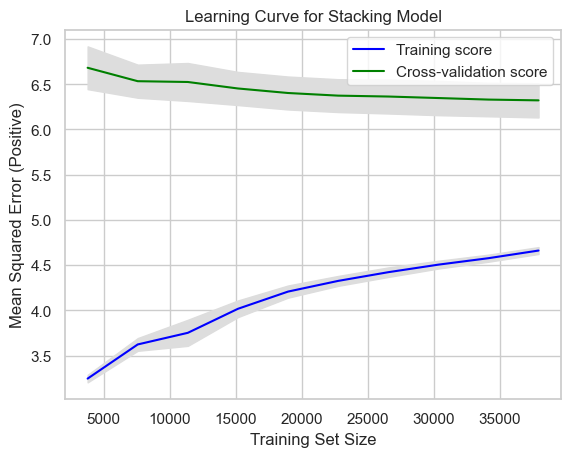

In [66]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Re-defining the stacked model as per the refined code provided
model1 = RandomForestRegressor(random_state=42)
model2 = GradientBoostingRegressor(random_state=42)
stacked_model = VotingRegressor(estimators=[('rf', model1), ('gb', model2)])

# Generating learning curve data with the scoring method updated to be positive
train_sizes, train_scores, test_scores = learning_curve(
    stacked_model, X, y, cv=5, 
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_squared_error'  # Using Negative MSE for demonstration, will convert to positive for visualization
)

# Calculate mean and standard deviation for training and test set scores, converting MSE to positive
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plotting the learning curve with adjustments for positive values
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
plt.plot(train_sizes, train_mean, label="Training score", color='blue')
plt.plot(train_sizes, test_mean, label="Cross-validation score", color='green')

plt.title("Learning Curve for Stacking Model")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error (Positive)")
plt.legend(loc="best")
plt.show()


### Comment: 
According to the learning curve, some observations of this model can be pointed out:
1. The relatively low MSE, ranging from 3 to 5, also indicates a certain degree of success in the data processing steps.
2. The persistent, considerable gap between the training and validation scores suggests potential overfitting and shortcomings in the data processing steps.

The biggest usage of the learning curve:
From the learning curve, an overfitting issue can be examined any time to adjust the preprocessing steps. As in Feature Selection, although selecting more features improves the R-squared value in the stacking model, the learning curve tends to become more parallel. Thus, 15 features can be a proper choice for the balance between the reaching a better performace and reducing overfitting issue.

# 12. Pipeline

In this pipeline building, the data frame wine_cleaned will be used to simply present processes from the 4th step "Data Cleaning".
While the numerical columns as "score" and "price" in the data frame "wine_cleaned" have been imputed well by the median method previously, this pipeline keeps the imputation process in order to present complete data preprocessing steps.

Here Generative AI is used to build pipeline, and below is the link.

https://chat.openai.com/share/8a342064-e3a4-4732-8ccc-11283c45114f

In [67]:
# Import necessary libraries
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

In [68]:
# Prepare the dataset to do pipeline
X = wine_cleaned.drop('score', axis=1)
y = wine_cleaned['score']

# Separate the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [69]:
# List of categorical and numeric columns
categorical_cols = ['state', 'region_1', 'region_2', 'winery', 'variety']
numeric_cols = ['price', 'year']

# Pipeline for categorical features: imputation followed by one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Pipeline for numeric features: median imputation
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

# Combine preprocessing steps for categorical and numeric data
preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_cols),
    ('num', numeric_transformer, numeric_cols)
])

# Define base models for the stacking regressor
base_models = [
    ('random_forest', RandomForestRegressor(random_state=42)),
    ('gradient_boosting', GradientBoostingRegressor(random_state=42))
]

# Create the stacking regressor
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())

# Feature selector 
feature_selector = SelectKBest(score_func=f_regression, k=15)

# Complete pipeline: preprocessing, feature selection, and regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selector', feature_selector),  # Feature selection applied here
    ('regressor', stacking_regressor)  # Regression model
])


In [70]:
# After some data manipulation, for successfully presenting the pipeline, realign using:
X_train = X_train.dropna()  # Adjust the data shape
y_train = y_train.loc[X_train.index]  # Ensure y_train aligns with the modified X_train

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

X_train shape: (35585, 7)
y_train shape: (35585,)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['state', 'region_1',
                                                   'region_2', 'winery',
                                                   'variety']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['price', 'year'])])),
                ('feature_selector',
                 SelectKBest(k=15,
                             score_func=<function f_regression at 0x152b1c9a0>)),
                ('regressor',
                 StackingRegressor(estimators=[('random_forest',
                                                RandomForestRegressor(random_state=42)),
                                               ('gradient_boosting',
                                                GradientBoostingRegressor(random_state=42))],
                                   final_estimator=LinearRegression()))])

This is a simplified flow for processing the dataset from data cleaning to stacking regression as the estimator.

### ・Evaluate the pipeline model 

In [71]:
# Predict on the testing set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error: 6.369530016187383
Root Mean Squared Error: 2.523792783924105
R-squared: 0.33098578882929797


### Comment: 
It is the performance of the Stacking Model before grid search. In comparison with the performance of the Stacking Model in the previous improvement where MSE was 6.17, RMSE was 2.48, and R-squared was 0.35209, the performance here is close, indicating the possibility to achieve similar results with simplier steps.

### ・Grid Search in Pipeline

From here it is presented how the model is refined by Grid Search.

### Important Reason to simplify the parameter setting in the Grid Search in pipeline

Below is the grid search parameter setting. However, the entire grid search for the Stacking Model wastes too much time (to a few hours), so here the complete parameter grid is kept, and a simplified version is executed to simulate the grid search in the pipeline.

In [72]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid
#param_grid = {
#    'regressor__random_forest__n_estimators': [100, 200],  # Number of trees in the random forest
#    'regressor__random_forest__max_depth': [None, 10, 20],  # Maximum depth of each tree
#    'regressor__gradient_boosting__n_estimators': [100, 200],  # Number of boosting stages to perform
#    'regressor__gradient_boosting__learning_rate': [0.01, 0.1],  # Learning rate shrinks the contribution of each tree
#    'regressor__final_estimator__fit_intercept': [True, False]  # Whether to calculate the intercept for the final estimator
#}

# Set up the parameter grid
param_grid = {
    'regressor__random_forest__n_estimators': [200],
    'regressor__random_forest__max_depth': [20],
    'regressor__gradient_boosting__n_estimators': [200],
    'regressor__gradient_boosting__learning_rate': [0.1],
    'regressor__final_estimator__fit_intercept': [True, False]
}
# Grid search setup
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=10,
    n_jobs=-1
)

# Fit grid search to the data
grid_search.fit(X_train, y_train)

# Outputs
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score (MSE):", -grid_search.best_score_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 2/5; 2/2] START regressor__final_estimator__fit_intercept=False, regressor__gradient_boosting__learning_rate=0.1, regressor__gradient_boosting__n_estimators=200, regressor__random_forest__max_depth=20, regressor__random_forest__n_estimators=200
[CV 2/5; 2/2] END regressor__final_estimator__fit_intercept=False, regressor__gradient_boosting__learning_rate=0.1, regressor__gradient_boosting__n_estimators=200, regressor__random_forest__max_depth=20, regressor__random_forest__n_estimators=200;, score=-6.164 total time= 2.4min
[CV 5/5; 2/2] START regressor__final_estimator__fit_intercept=False, regressor__gradient_boosting__learning_rate=0.1, regressor__gradient_boosting__n_estimators=200, regressor__random_forest__max_depth=20, regressor__random_forest__n_estimators=200
[CV 5/5; 2/2] END regressor__final_estimator__fit_intercept=False, regressor__gradient_boosting__learning_rate=0.1, regressor__gradient_boosting__n_estimators=20

### ・Review the Best Parameters of the Model

Here is the best parameters from grid search.

In [73]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score (MSE):", -grid_search.best_score_)

# Get the best estimator directly
best_model = grid_search.best_estimator_


Best parameters: {'regressor__final_estimator__fit_intercept': True, 'regressor__gradient_boosting__learning_rate': 0.1, 'regressor__gradient_boosting__n_estimators': 200, 'regressor__random_forest__max_depth': 20, 'regressor__random_forest__n_estimators': 200}
Best cross-validation score (MSE): 6.195736382075949


In [74]:
# Best model after grid search
best_model = grid_search.best_estimator_

# Predict using the best model
y_pred = best_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the scores
print("Mean Squared Error: {:.2f}".format(mse))
print("Root Mean Squared Error: {:.2f}".format(rmse))
print("R-squared: {:.2f}".format(r2))

Mean Squared Error: 6.35
Root Mean Squared Error: 2.52
R-squared: 0.33


### Comment: 
Using Grid Search, the Stacking Model may show improvements from previous steps. However, these improvements are not evident in the pipeline due to the simplified grid settings and the slow operation of the Grid Search within the pipeline. Despite this, the value of the pipeline system in demonstrating the comprehensive steps involved in building a project is commendable.